## bussiness problem

## OVERVIEW
A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two years back. Their higher management has noticed that there is a mismatch in the demand and supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to 
optimize the supply quantity in each and every warehouse in the entire country.


GOALS
The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse

In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.style
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
df=pd.read_csv("C:/Users/asnaa/Downloads/supply_train.csv")
df

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0               0     WH_100000     EID_50000         Urban            Small   
1               1     WH_100001     EID_50001         Rural            Large   
2               2     WH_100002     EID_50002         Rural              Mid   
3               3     WH_100003     EID_50003         Rural              Mid   
4               4     WH_100004     EID_50004         Rural            Large   
...           ...           ...           ...           ...              ...   
16615       16615     WH_116615     EID_66615         Urban            Large   
16616       16616     WH_116616     EID_66616         Urban            Large   
16617       16617     WH_116617     EID_66617         Rural            Large   
16618       16618     WH_116618     EID_66618         Rural            Small   
16619       16619     WH_116619     EID_66619         Rural            Large   

        zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0       West           Zone 6                   3                    1   
1      North           Zone 5                   0                    0   
2      South           Zone 2                   1                    0   
3      North           Zone 3                   7                    4   
4      North           Zone 5                   3                    1   
...      ...              ...                 ...                  ...   
16615   West           Zone 6                   3                    1   
16616  North           Zone 5                   2                    0   
16617  North           Zone 6                   5                    0   
16618   West           Zone 6                   3                    2   
16619   West           Zone 5                   4                    0   

       Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                      2  ...                1            91         29.0   
1                      4  ...                1           210         31.0   
2                      4  ...                0           161         37.0   
3                      2  ...                0           103         21.0   
4                      2  ...                1           112         25.0   
...                  ...  ...              ...           ...          ...   
16615                  6  ...                0           240         19.0   
16616                  2  ...                1           164         30.0   
16617                  4  ...                1           211         24.0   
16618                  3  ...                1           119          NaN   
16619                  6  ...                1           261         34.0   

       wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0              NaN                          13              0   
1              NaN                           4              0   
2              NaN                          17              0   
3              NaN                          17              1   
4           2009.0                          18              0   
...            ...                         ...            ...   
16615       2009.0                          14              0   
16616          NaN                          17              0   
16617       2003.0                          24              1   
16618       2007.0                          16              0   
16619       2001.0                          32              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                                 A                 5              15   
1                                 A                 3              17   
2                                 A                 6              22   
3                                A+                 3              27   
4                                 C                 6              24   
...          

In [5]:
df.head()

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0           0     WH_100000     EID_50000         Urban            Small   
1           1     WH_100001     EID_50001         Rural            Large   
2           2     WH_100002     EID_50002         Rural              Mid   
3           3     WH_100003     EID_50003         Rural              Mid   
4           4     WH_100004     EID_50004         Rural            Large   

    zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0   West           Zone 6                   3                    1   
1  North           Zone 5                   0                    0   
2  South           Zone 2                   1                    0   
3  North           Zone 3                   7                    4   
4  North           Zone 5                   3                    1   

   Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                  2  ...                1            91         29.0   
1                  4  ...                1           210         31.0   
2                  4  ...                0           161         37.0   
3                  2  ...                0           103         21.0   
4                  2  ...                1           112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 25 columns]

In [6]:
# to drop first column

df=df.drop('Unnamed: 0', axis=1)
df

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0         WH_100000     EID_50000         Urban            Small   West   
1         WH_100001     EID_50001         Rural            Large  North   
2         WH_100002     EID_50002         Rural              Mid  South   
3         WH_100003     EID_50003         Rural              Mid  North   
4         WH_100004     EID_50004         Rural            Large  North   
...             ...           ...           ...              ...    ...   
16615     WH_116615     EID_66615         Urban            Large   West   
16616     WH_116616     EID_66616         Urban            Large  North   
16617     WH_116617     EID_66617         Rural            Large  North   
16618     WH_116618     EID_66618         Rural            Small   West   
16619     WH_116619     EID_66619         Rural            Large   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0               Zone 6                   3                    1   
1               Zone 5                   0                    0   
2               Zone 2                   1                    0   
3               Zone 3                   7                    4   
4               Zone 5                   3                    1   
...                ...                 ...                  ...   
16615           Zone 6                   3                    1   
16616           Zone 5                   2                    0   
16617           Zone 6                   5                    0   
16618           Zone 6                   3                    2   
16619           Zone 5                   4                    0   

       Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                      2             4651  ...               1             91   
1                      4             6217  ...               1            210   
2                      4             4306  ...               0            161   
3                      2             6000  ...               0            103   
4                      2             4740  ...               1            112   
...                  ...              ...  ...             ...            ...   
16615                  6             4779  ...               0            240   
16616                  2             5718  ...               1            164   
16617                  4             4514  ...               1            211   
16618                  3             5829  ...               1            119   
16619                  6             3751  ...               1            261   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0             29.0          NaN                          13              0   
1             31.0          NaN                           4              0   
2             37.0          NaN                          17              0   
3             21.0          NaN                          17              1   
4             25.0       2009.0                          18              0   
...            ...          ...                         ...            ...   
16615         19.0       2009.0                          14              0   
16616         30.0          NaN                          17              0   
16617         24.0       2003.0                          24              1   
16618          NaN       2007.0                          16              0   
16619         34.0       2001.0                          32              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                                 A                 5              15   
1                                 A                 3              17   
2                                 A                 6              22   
3                                A+                 3              27   
4                        

In [7]:
pd.options.display.max_columns= None
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

## check the number of rows and columns

In [8]:
df.shape

(16620, 24)

In [9]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

## descriptive details

In [10]:
df.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        16620.000000         16620.000000       16620.000000   
mean             4.126655             0.780927           3.103129   
std              2.606241             1.206351           1.147711   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     16620.000000     16620.000000    16620.000000  16620.000000   
mean       4983.904994        42.473706        0.096871      0.056017   
std        1051.032239        16.090000        0.295791      0.229961   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4309.000000        29.000000        0.000000      0.000000   
50%        4856.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num  wh_est_year  \
count     16620.000000   16620.000000  15953.000000  8760.000000   
mean          0.655716     163.521901     28.911490  2009.345320   
std           0.475149      62.701193      7.842046     7.544672   
min           0.000000      55.000000     10.000000  1996.000000   
25%           0.000000     109.000000     24.000000  2003.000000   
50%           1.000000     164.000000     28.000000  2009.000000   
75%           1.000000     218.000000     33.000000  2016.000000   
max           1.000000     271.000000     98.000000  2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                16620.000000   16620.000000      16620.000000   
mean                    17.127196       0.306137          3.491095   
std                      9.163901       0.460901          1.688614   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    16620.000000    16620.000000  
mean        18.727377    22098.420096  
std          8.619857    11620.337346  
min          1.000000     2093.000000  
25%         11.000000    13057.000000  
50%         19.000000    22099.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

## understanding od attributes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

## Exploratory data analysis

##### unique values

In [12]:
df.Ware_house_ID.nunique()

16620

In [13]:
df.WH_Manager_ID.nunique()

16620

In [14]:
df.drop(['Ware_house_ID', 'WH_Manager_ID'], axis=1, inplace=True)


In [15]:
df

Location_type WH_capacity_size   zone WH_regional_zone  \
0             Urban            Small   West           Zone 6   
1             Rural            Large  North           Zone 5   
2             Rural              Mid  South           Zone 2   
3             Rural              Mid  North           Zone 3   
4             Rural            Large  North           Zone 5   
...             ...              ...    ...              ...   
16615         Urban            Large   West           Zone 6   
16616         Urban            Large  North           Zone 5   
16617         Rural            Large  North           Zone 6   
16618         Rural            Small   West           Zone 6   
16619         Rural            Large   West           Zone 5   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                       3                    1                  2   
1                       0                    0                  4   
2                       1                    0                  4   
3                       7                    4                  2   
4                       3                    1                  2   
...                   ...                  ...                ...   
16615                   3                    1                  6   
16616                   2                    0                  2   
16617                   5                    0                  4   
16618                   3                    2                  3   
16619                   4                    0                  6   

       retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0                 4651         Rented               24               0   
1                 6217  Company Owned               47               0   
2                 4306  Company Owned               64               0   
3                 6000         Rented               50               0   
4                 4740  Company Owned               42               1   
...                ...            ...              ...             ...   
16615             4779         Rented               70               0   
16616             5718  Company Owned               26               0   
16617             4514  Company Owned               50               1   
16618             5829         Rented               59               1   
16619             3751         Rented               49               0   

       flood_proof  electric_supply  dist_from_hub  workers_num  wh_est_year  \
0                1                1             91         29.0          NaN   
1                0                1            210         31.0          NaN   
2                0                0            161         37.0          NaN   
3                0                0            103         21.0          NaN   
4                0                1            112         25.0       2009.0   
...            ...              ...            ...          ...          ...   
16615            0                0            240         19.0       2009.0   
16616            0                1            164         30.0          NaN   
16617            0                1            211         24.0       2003.0   
16618            0                1            119          NaN       2007.0   
16619            0                1            261         34.0       2001.0   

       storage_issue_reported_l3m  temp_reg_mach approved_wh_govt_certificate  \
0                              13              0                            A   
1                               4              0                            A   
2                              17              0                            A   
3                              17              1                           A+   
4                              18              0                            C   
...                           ...            ...                        

## Remove the unwanted variables before we move on to the univaraite and bivariate anlyscis, bsic steps should be performed to avolid complexities, 
Hence ,we removing the un wanted variable that are not useful for the analysis and model building

## Missing values

In [16]:
df.isnull().sum()*100/len(df)

Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      4.013237
wh_est_year                     47.292419
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     3.604091
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0.000000
product_wg_ton                   0.000000
dtype: float64

In [17]:
#we can drop the warehouse estimate featuers as there is47% missing data and also because there is no need to predict the dependent variable


df.drop(['wh_est_year'],axis=1,inplace=True)

In [18]:
#the missing values in"approved_wh_govt_certificate"  are Low so we can use "mode" value fill as it is a categorical variable


df.workers_num.fillna(df.workers_num.mean(),inplace=True)

In [19]:
# now the missing values completely eradicated
df.isnull().sum()*100/len(df)

Location_type                   0.000000
WH_capacity_size                0.000000
zone                            0.000000
WH_regional_zone                0.000000
num_refill_req_l3m              0.000000
transport_issue_l1y             0.000000
Competitor_in_mkt               0.000000
retail_shop_num                 0.000000
wh_owner_type                   0.000000
distributor_num                 0.000000
flood_impacted                  0.000000
flood_proof                     0.000000
electric_supply                 0.000000
dist_from_hub                   0.000000
workers_num                     0.000000
storage_issue_reported_l3m      0.000000
temp_reg_mach                   0.000000
approved_wh_govt_certificate    3.604091
wh_breakdown_l3m                0.000000
govt_check_l3m                  0.000000
product_wg_ton                  0.000000
dtype: float64

## duplicate values

In [20]:
df.duplicated().sum()

np.int64(0)

## variable transformation:Converting data types

In [21]:
before=df.dtypes
before


Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [22]:
#  converting dtypes using astype

from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Location_type']=label_encoder.fit_transform(df['Location_type'])
df['WH_capacity_size']=label_encoder.fit_transform(df['WH_capacity_size'])
df['zone']=label_encoder.fit_transform(df['zone'])
df['WH_regional_zone ']=label_encoder.fit_transform(df['WH_regional_zone'])
df['wh_owner_type']=label_encoder.fit_transform(df['wh_owner_type'])
df['approved_wh_govt_certificate']=label_encoder.fit_transform(df['approved_wh_govt_certificate'])

df

Location_type  WH_capacity_size  zone WH_regional_zone  \
0                  1                 2     3           Zone 6   
1                  0                 0     1           Zone 5   
2                  0                 1     2           Zone 2   
3                  0                 1     1           Zone 3   
4                  0                 0     1           Zone 5   
...              ...               ...   ...              ...   
16615              1                 0     3           Zone 6   
16616              1                 0     1           Zone 5   
16617              0                 0     1           Zone 6   
16618              0                 2     3           Zone 6   
16619              0                 0     3           Zone 5   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                       3                    1                  2   
1                       0                    0                  4   
2                       1                    0                  4   
3                       7                    4                  2   
4                       3                    1                  2   
...                   ...                  ...                ...   
16615                   3                    1                  6   
16616                   2                    0                  2   
16617                   5                    0                  4   
16618                   3                    2                  3   
16619                   4                    0                  6   

       retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0                 4651              1               24               0   
1                 6217              0               47               0   
2                 4306              0               64               0   
3                 6000              1               50               0   
4                 4740              0               42               1   
...                ...            ...              ...             ...   
16615             4779              1               70               0   
16616             5718              0               26               0   
16617             4514              0               50               1   
16618             5829              1               59               1   
16619             3751              1               49               0   

       flood_proof  electric_supply  dist_from_hub  workers_num  \
0                1                1             91     29.00000   
1                0                1            210     31.00000   
2                0                0            161     37.00000   
3                0                0            103     21.00000   
4                0                1            112     25.00000   
...            ...              ...            ...          ...   
16615            0                0            240     19.00000   
16616            0                1            164     30.00000   
16617            0                1            211     24.00000   
16618            0                1            119     28.91149   
16619            0                1            261     34.00000   

       storage_issue_reported_l3m  temp_reg_mach  \
0                              13              0   
1                               4              0   
2                              17              0   
3                              17              1   
4                              18              0   
...                           ...            ...   
16615                          14              0   
16616                          17              0   
16617                          24              1   
16618                          16              0   
16619                          32              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0    

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  int64  
 1   WH_capacity_size              16620 non-null  int64  
 2   zone                          16620 non-null  int64  
 3   WH_regional_zone              16620 non-null  object 
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  int64  
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

## univariate Analysis

In [24]:
##it involving exloring individuals variables in a dataset
#so we can create histogram, box plots ,or bar charts to visualite the distribution of numerical of numerical and categorical variables

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  int64  
 1   WH_capacity_size              16620 non-null  int64  
 2   zone                          16620 non-null  int64  
 3   WH_regional_zone              16620 non-null  object 
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  int64  
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

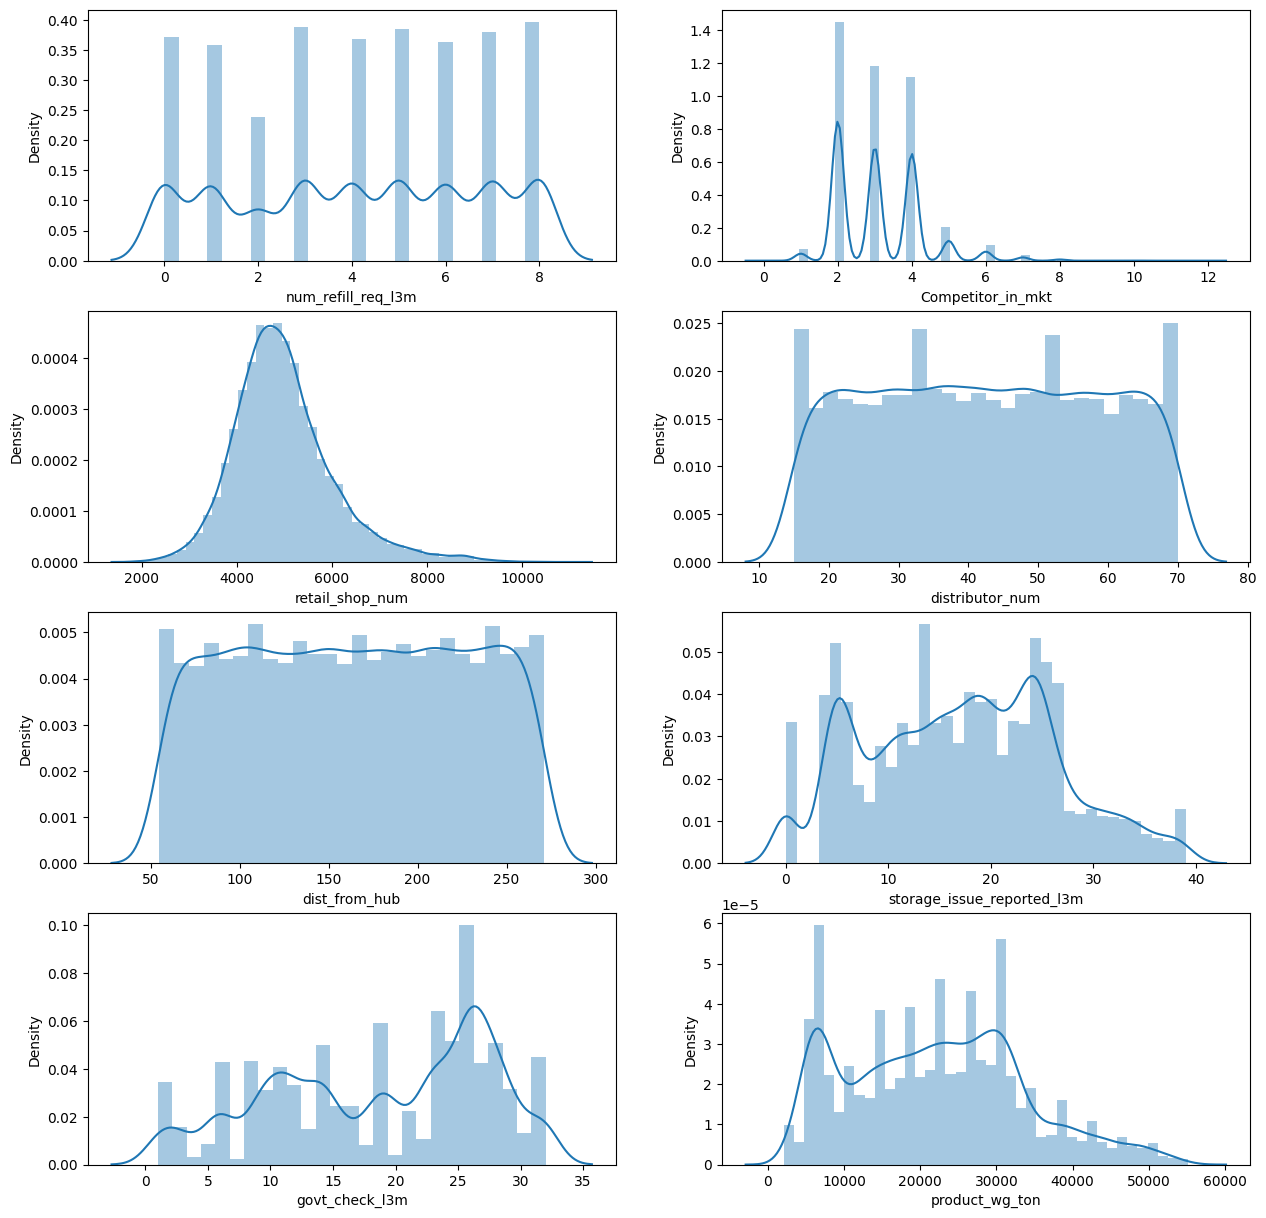

In [26]:
from warnings import filterwarnings
filterwarnings("ignore")


# check numerial values
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.distplot(df['num_refill_req_l3m'],kde=True, ax=axes[0][0])
sns.distplot(df['Competitor_in_mkt'] , kde=True, ax=axes[0][1])
sns.distplot(df['retail_shop_num'] , kde=True, ax=axes[1][0])
sns.distplot(df['distributor_num'] , kde=True, ax=axes[1][1])
sns.distplot(df['dist_from_hub'] , kde=True, ax=axes[2][0])
sns.distplot(df['storage_issue_reported_l3m'] , kde=True, ax=axes[2][1])
sns.distplot(df['govt_check_l3m'] , kde=True, ax=axes[3][0])
sns.distplot(df['product_wg_ton'] , kde=True, ax=axes[3][1])
plt.show()

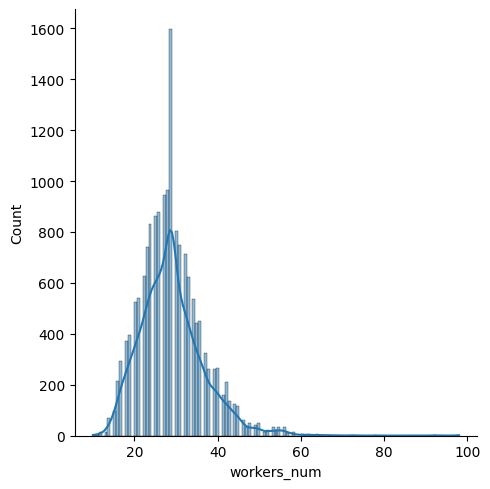

In [27]:
sns.displot(df[ 'workers_num'],kde=True)

<Axes: xlabel='product_wg_ton'>

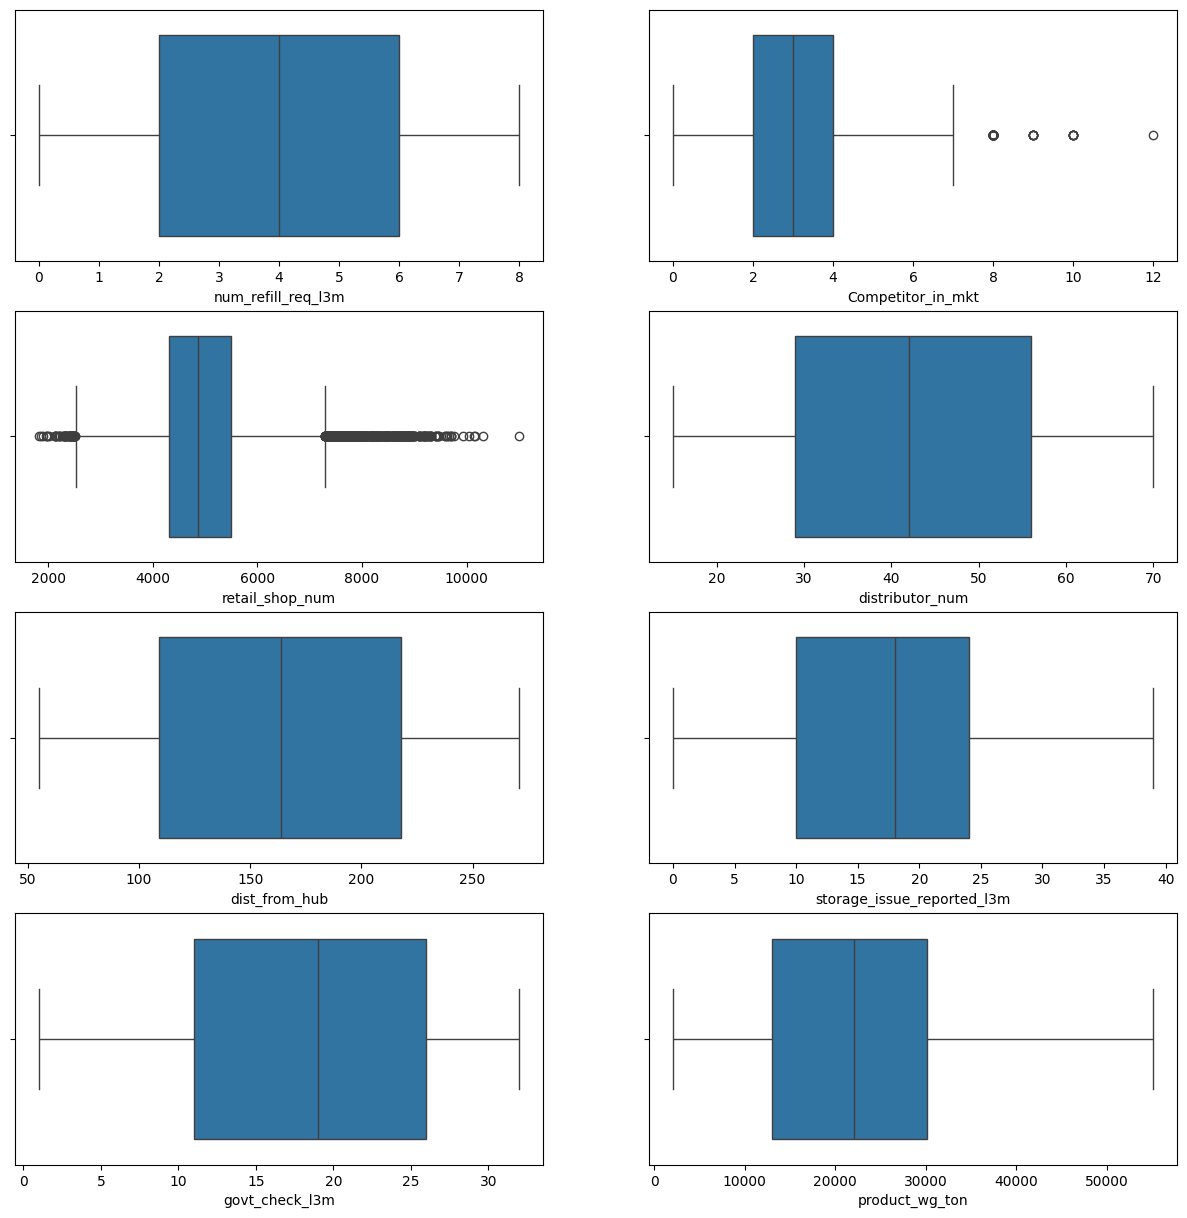

In [28]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(x='num_refill_req_l3m',data=df, ax=axes[0][0])
sns.boxplot(x='Competitor_in_mkt', data=df, ax=axes[0][1])
sns.boxplot(x='retail_shop_num' , data=df, ax=axes[1][0])
sns.boxplot(x='distributor_num' , data=df, ax=axes[1][1])
sns.boxplot(x='dist_from_hub' , data=df, ax=axes[2][0])
sns.boxplot(x='storage_issue_reported_l3m' , data=df, ax=axes[2][1])
sns.boxplot(x='govt_check_l3m' , data=df, ax=axes[3][0])
sns.boxplot(x='product_wg_ton' , data=df, ax=axes[3][1])


<Axes: xlabel='workers_num'>

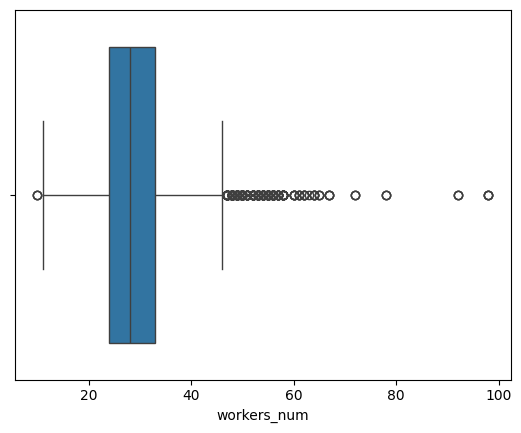

In [29]:
sns.boxplot(x='workers_num',data=df)

<Axes: xlabel='wh_breakdown_l3m', ylabel='count'>

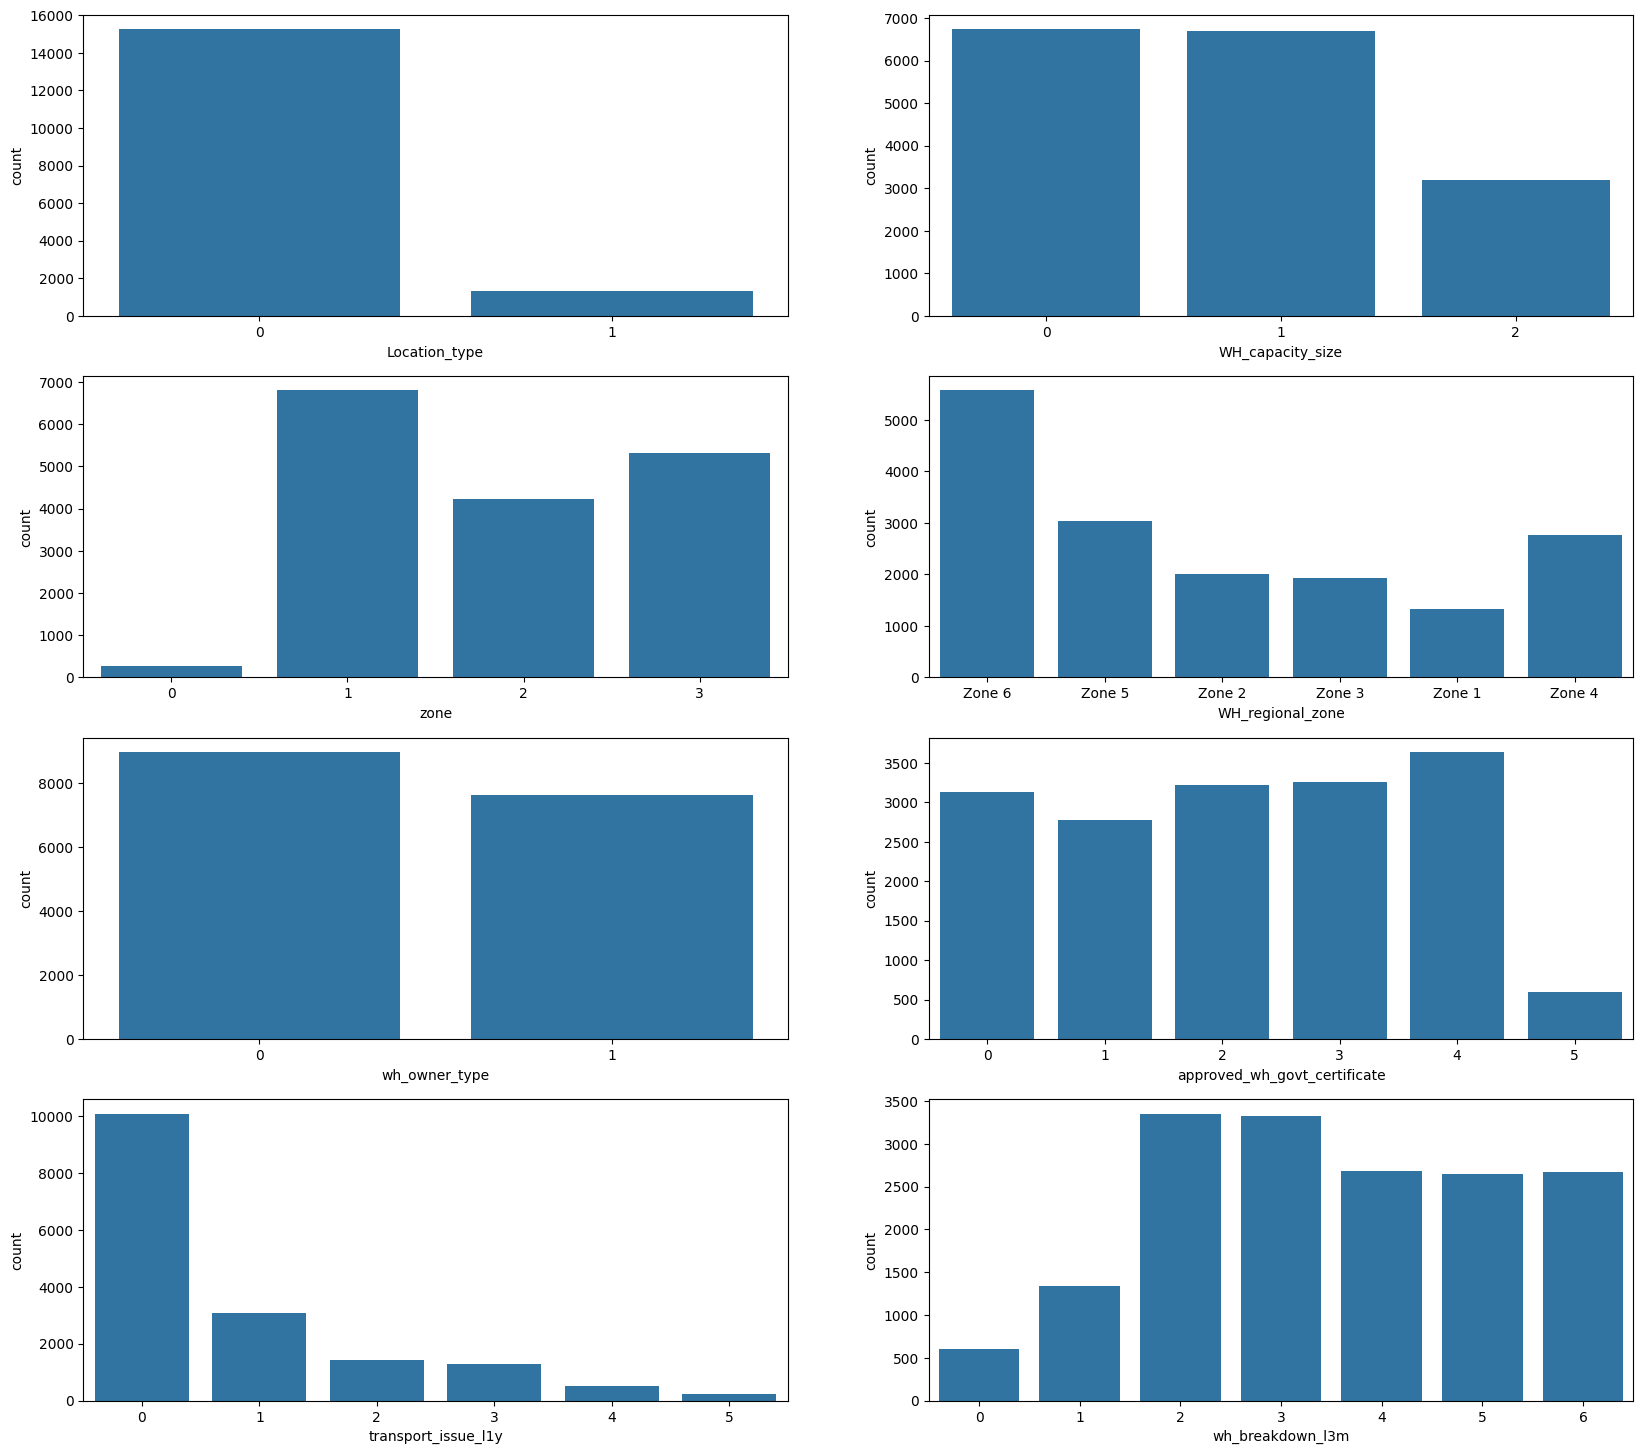

In [30]:
# check category
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.countplot(x='Location_type', data=df, ax=axes[0][0])
sns.countplot(x='WH_capacity_size', data=df, ax=axes[0][1])
sns.countplot(x='zone', data=df, ax=axes[1][0])
sns.countplot(x='WH_regional_zone', data=df, ax=axes[1][1])
sns.countplot(x='wh_owner_type', data=df, ax=axes[2][0])
sns.countplot(x='approved_wh_govt_certificate', data=df, ax=axes[2][1])
sns.countplot(x='transport_issue_l1y', data=df, ax=axes[3][0])
sns.countplot(x='wh_breakdown_l3m', data=df, ax=axes[3][1])


## Bivariate analysis

<Axes: xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

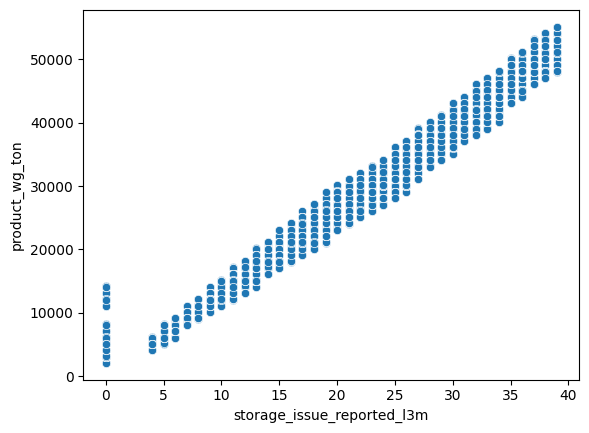

In [31]:
sns.scatterplot(x='storage_issue_reported_l3m',y="product_wg_ton",data=df)

<Axes: xlabel='workers_num', ylabel='product_wg_ton'>

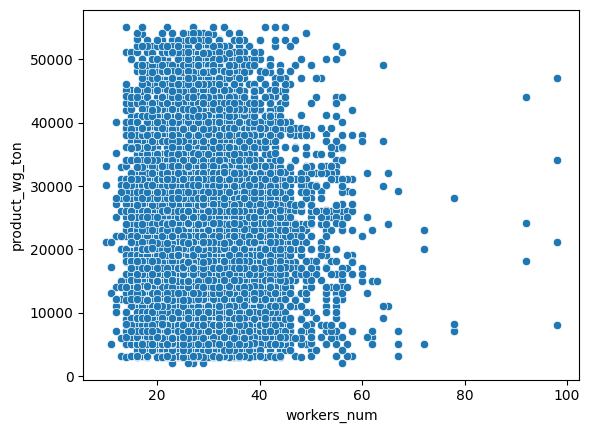

In [32]:
sns.scatterplot(x='workers_num', y='product_wg_ton',data=df)

<Axes: xlabel='Location_type', ylabel='retail_shop_num'>

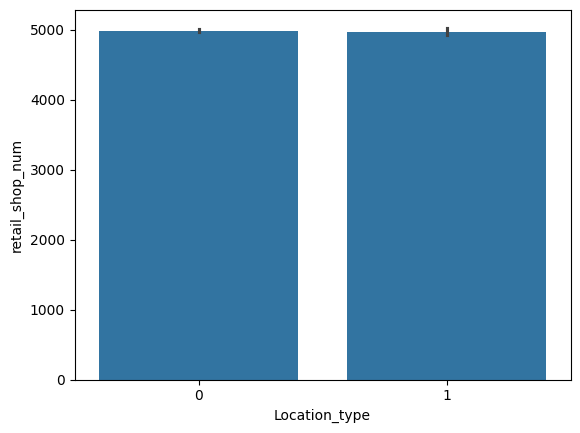

In [33]:
sns.barplot(x='Location_type', y='retail_shop_num',data=df)

<Axes: xlabel='zone', ylabel='retail_shop_num'>

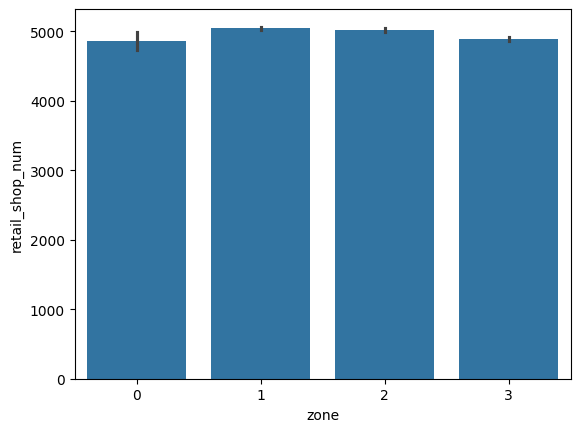

In [34]:
sns.barplot(x='zone', y='retail_shop_num',data=df)

<Axes: xlabel='zone', ylabel='storage_issue_reported_l3m'>

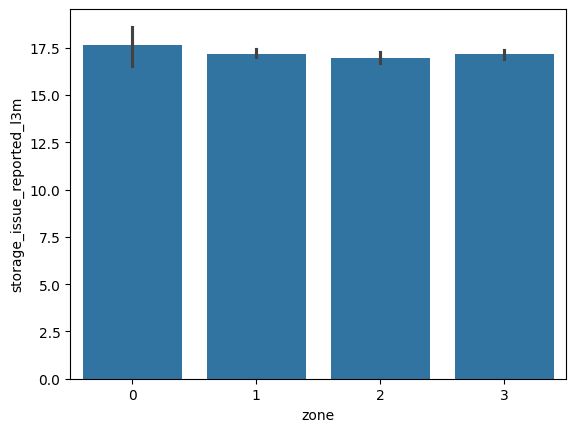

In [35]:
sns.barplot(x='zone', y='storage_issue_reported_l3m',data=df)

<Axes: xlabel='flood_impacted', ylabel='count'>

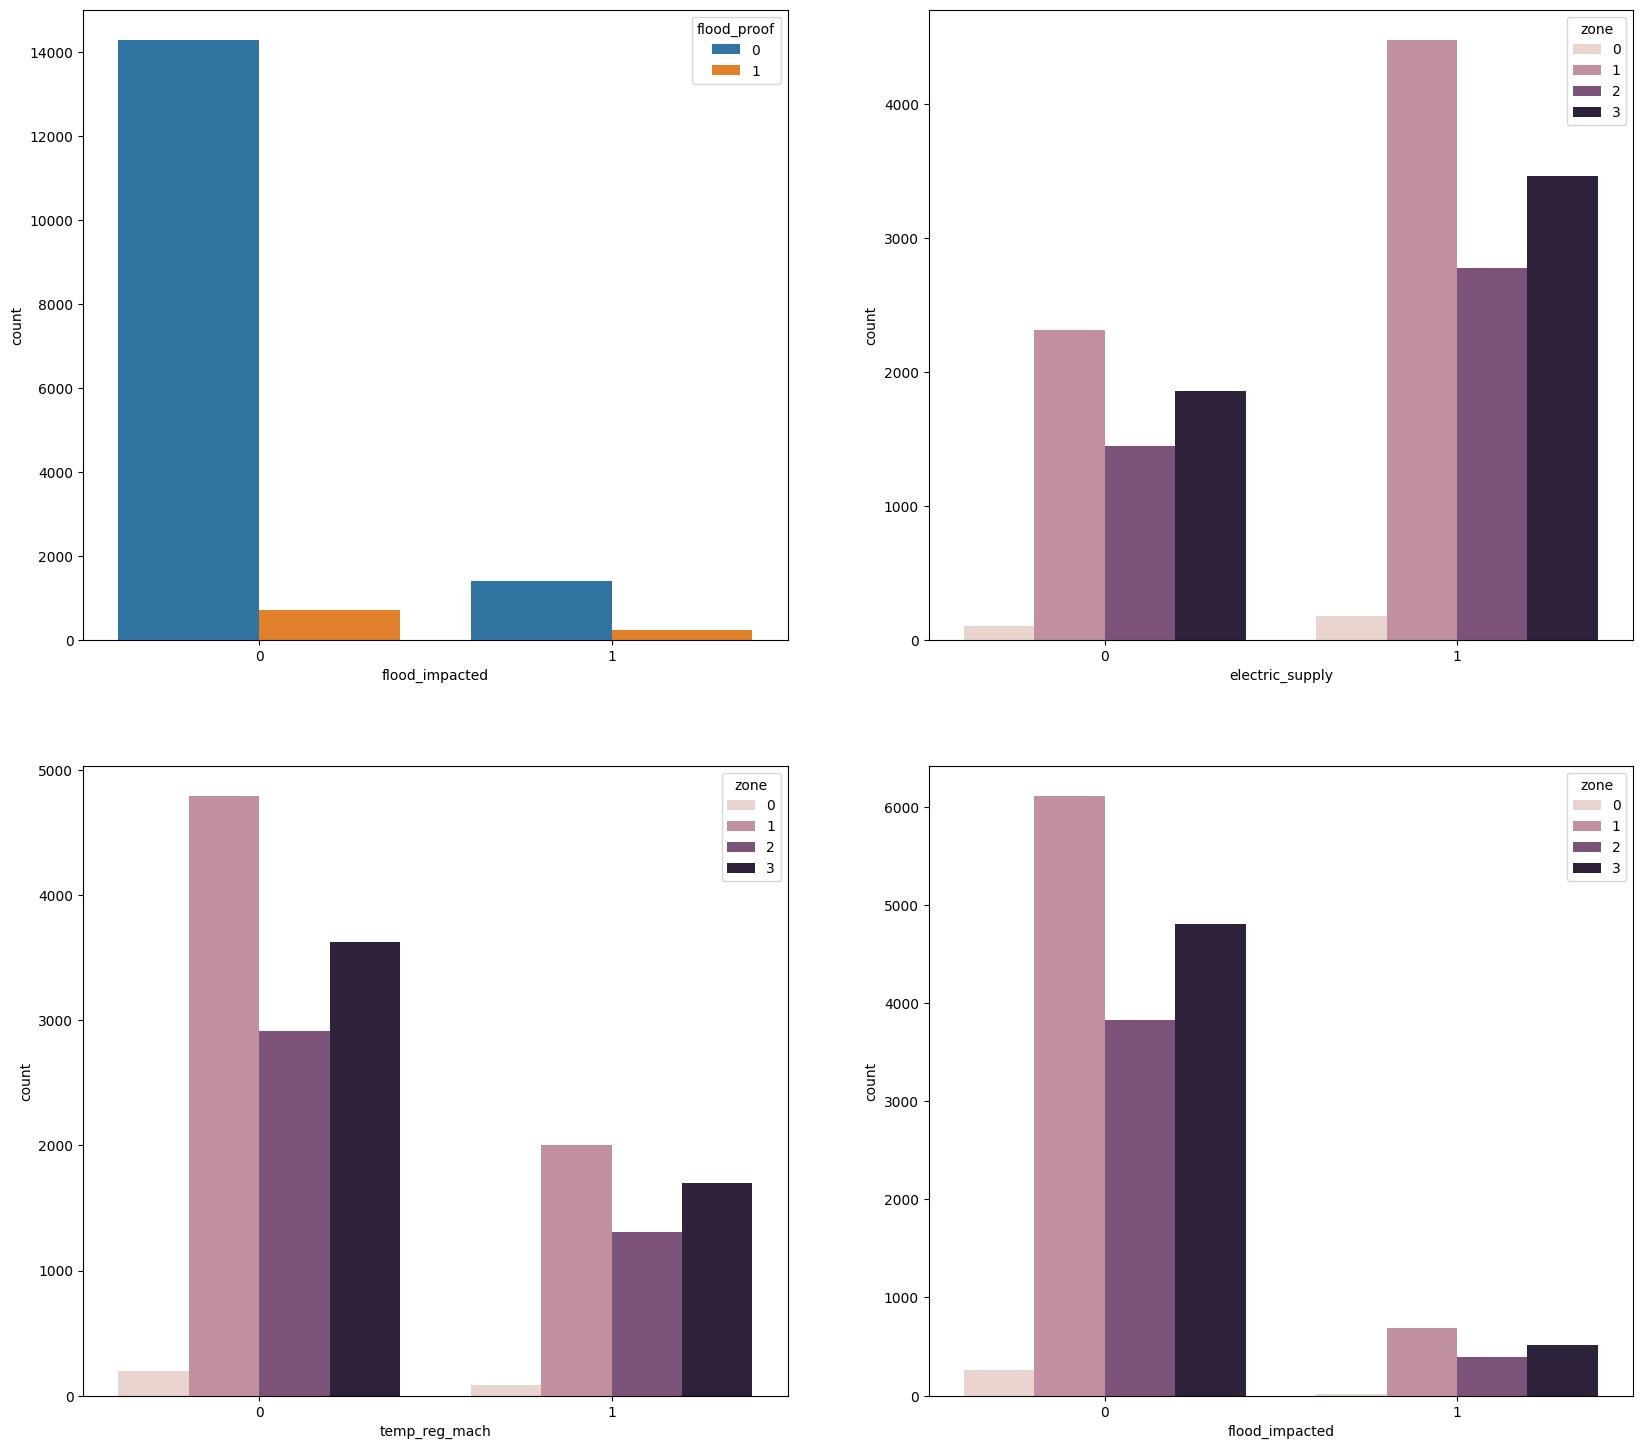

In [36]:
# check category
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,18)
sns.countplot(x='flood_impacted',hue='flood_proof', data=df, ax=axes[0][0])
sns.countplot(x='electric_supply',hue='zone', data=df, ax=axes[0][1])
sns.countplot(x='temp_reg_mach',hue='zone', data=df, ax=axes[1][0])
sns.countplot(x='flood_impacted',hue='zone', data=df, ax=axes[1][1])


<Axes: xlabel='flood_impacted'>

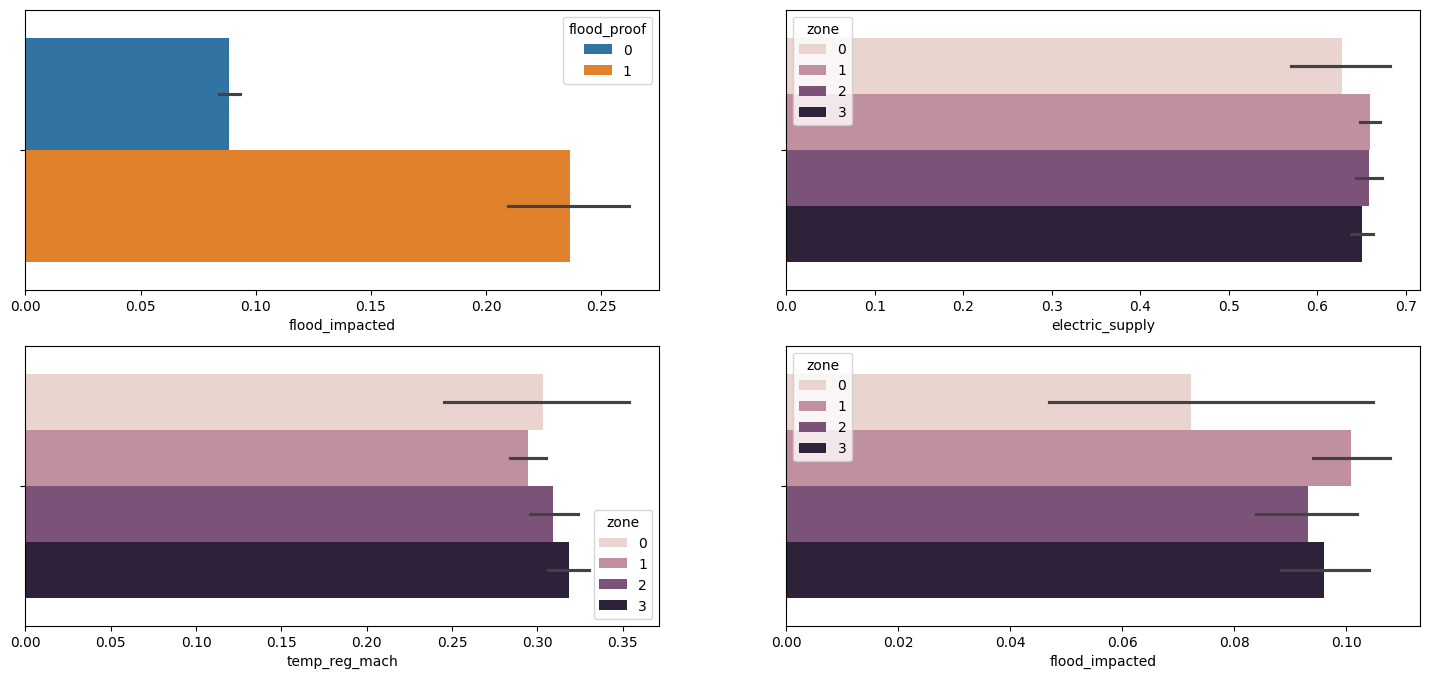

In [37]:
# check category
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)
sns.barplot(x='flood_impacted',hue='flood_proof', data=df, ax=axes[0][0])
sns.barplot(x='electric_supply',hue='zone', data=df, ax=axes[0][1])
sns.barplot(x='temp_reg_mach',hue='zone', data=df, ax=axes[1][0])
sns.barplot(x='flood_impacted',hue='zone', data=df, ax=axes[1][1])

<Axes: xlabel='flood_impacted'>

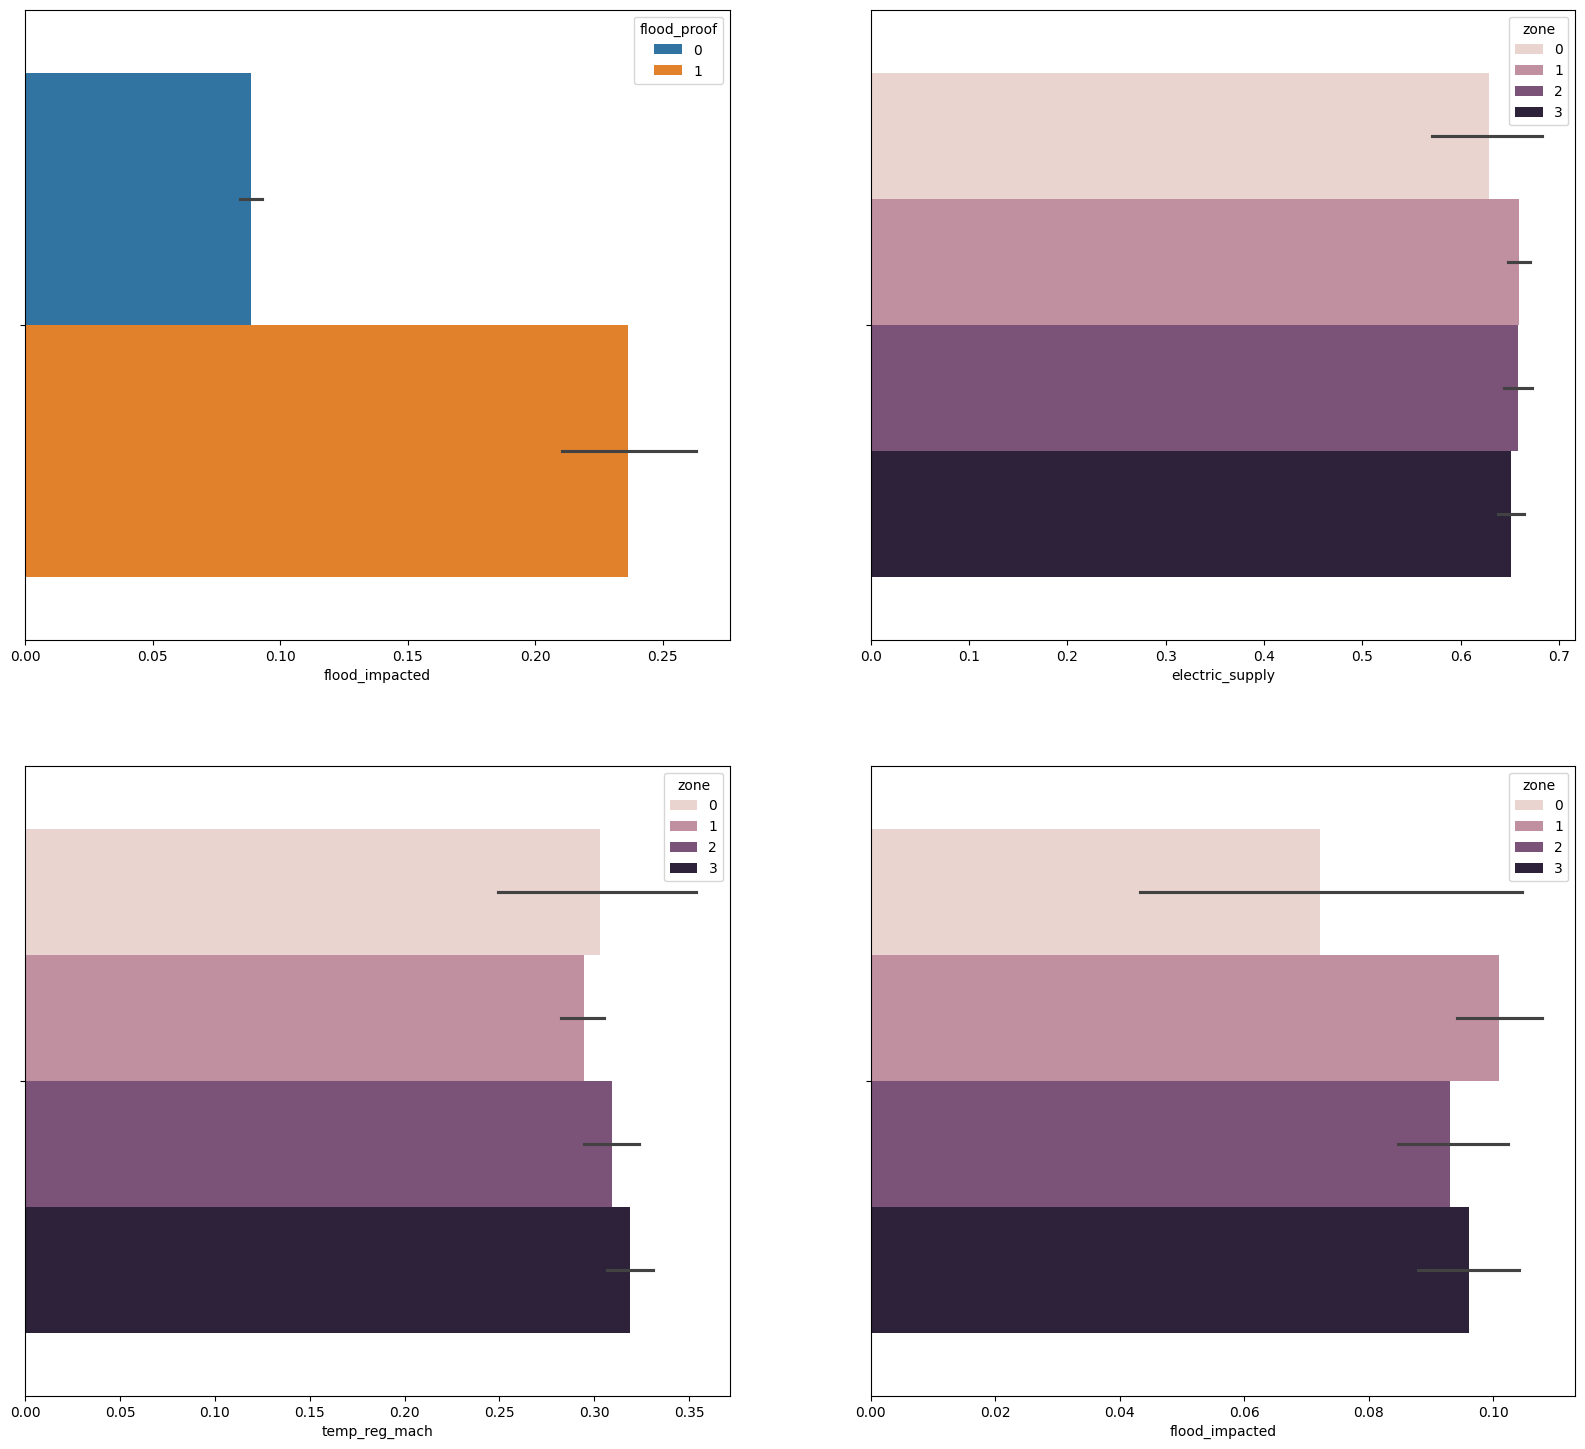

In [38]:
# check category
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,18)
sns.barplot(x='flood_impacted',hue='flood_proof', data=df, ax=axes[0][0])
sns.barplot(x='electric_supply',hue='zone', data=df, ax=axes[0][1])
sns.barplot(x='temp_reg_mach',hue='zone', data=df, ax=axes[1][0])
sns.barplot(x='flood_impacted',hue='zone', data=df, ax=axes[1][1])

<Axes: xlabel='wh_breakdown_l3m', ylabel='product_wg_ton'>

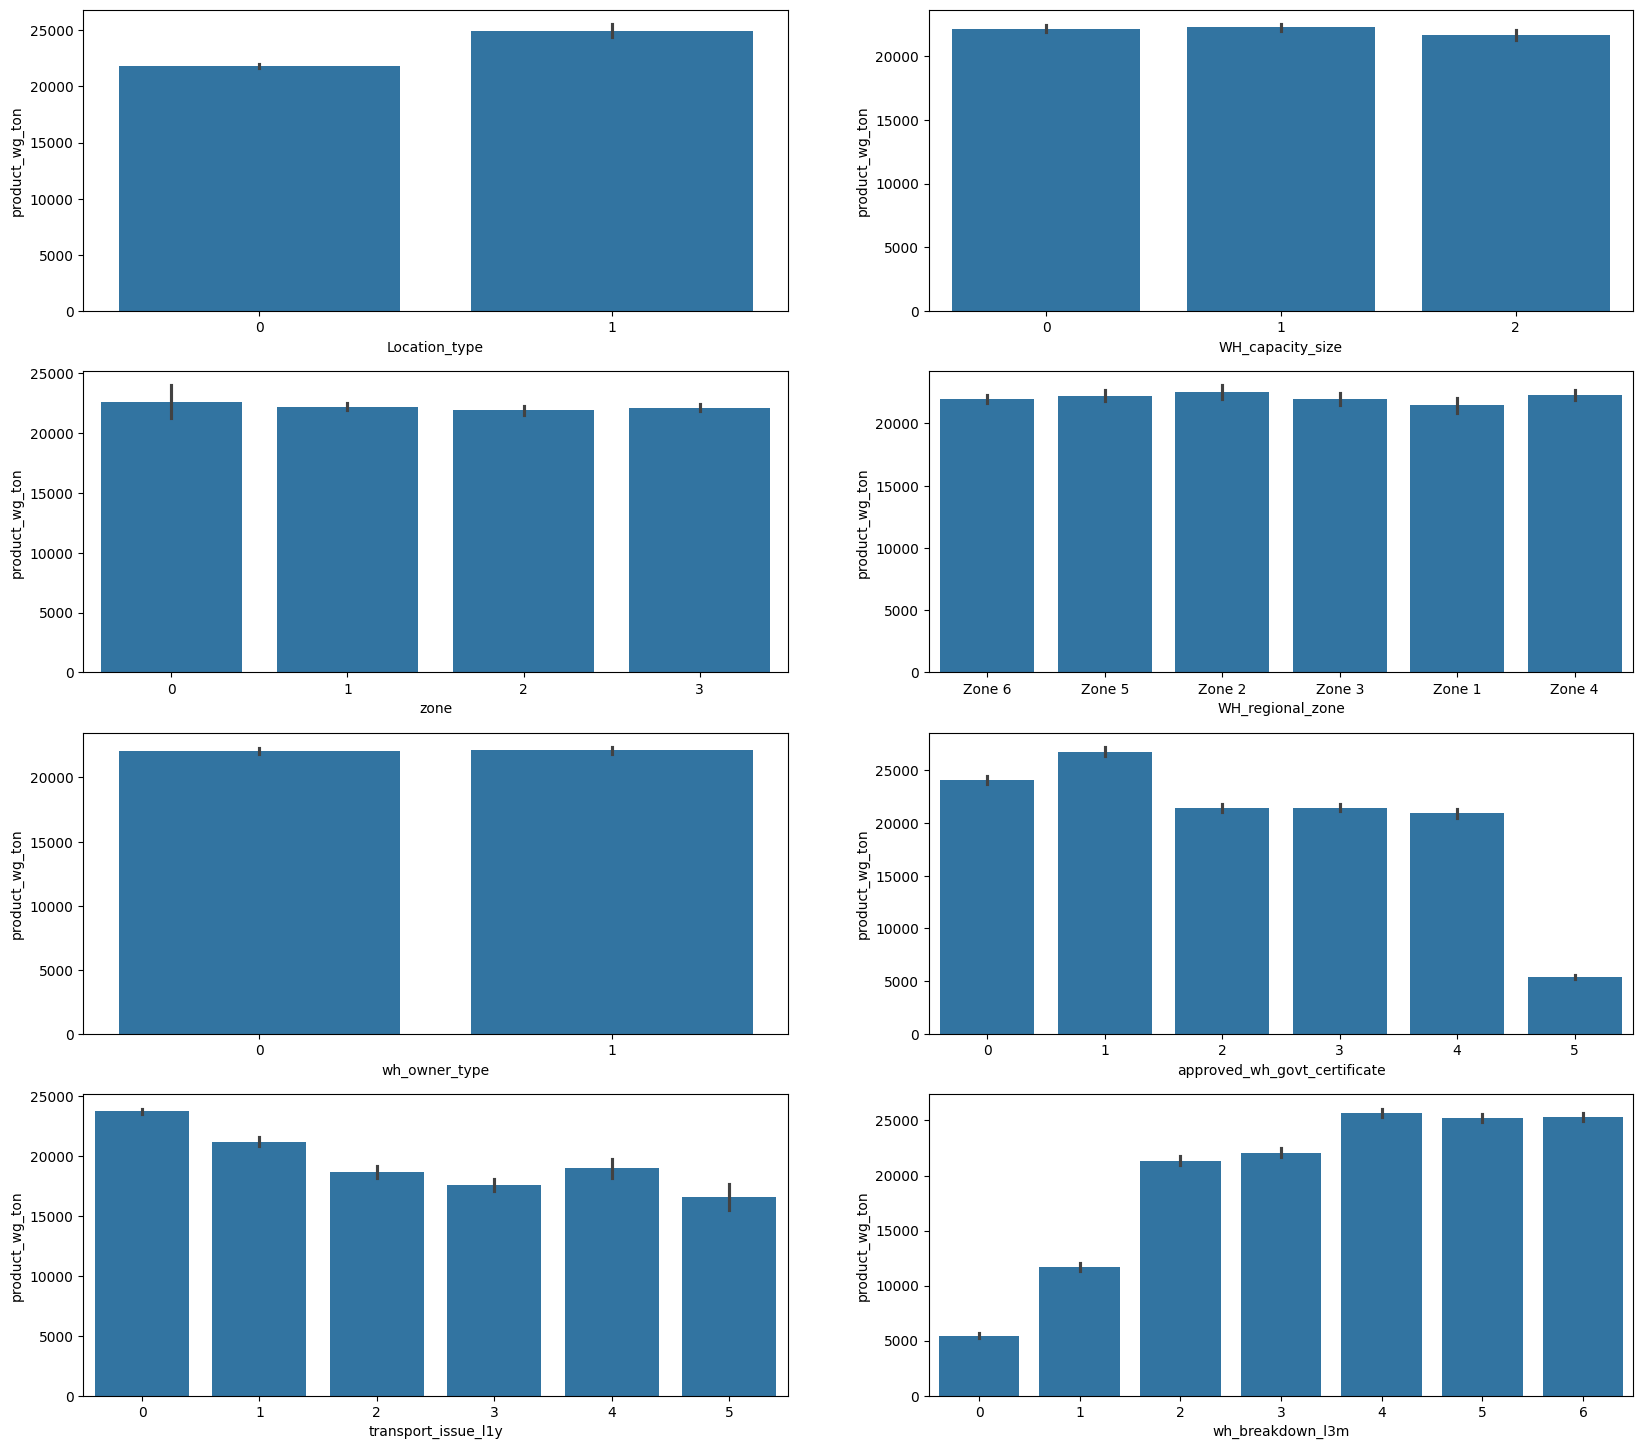

In [39]:
# check category
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.barplot(x='Location_type',y='product_wg_ton', data=df, ax=axes[0][0])
sns.barplot(x='WH_capacity_size',y='product_wg_ton', data=df, ax=axes[0][1])
sns.barplot(x='zone', data=df,y='product_wg_ton', ax=axes[1][0])
sns.barplot(x='WH_regional_zone',y='product_wg_ton', data=df, ax=axes[1][1])
sns.barplot(x='wh_owner_type',y='product_wg_ton', data=df, ax=axes[2][0])
sns.barplot(x='approved_wh_govt_certificate',y='product_wg_ton', data=df, ax=axes[2][1])
sns.barplot(x='transport_issue_l1y', y='product_wg_ton',data=df, ax=axes[3][0])
sns.barplot(x='wh_breakdown_l3m',y='product_wg_ton', data=df, ax=axes[3][1])

<Axes: xlabel='wh_breakdown_l3m', ylabel='product_wg_ton'>

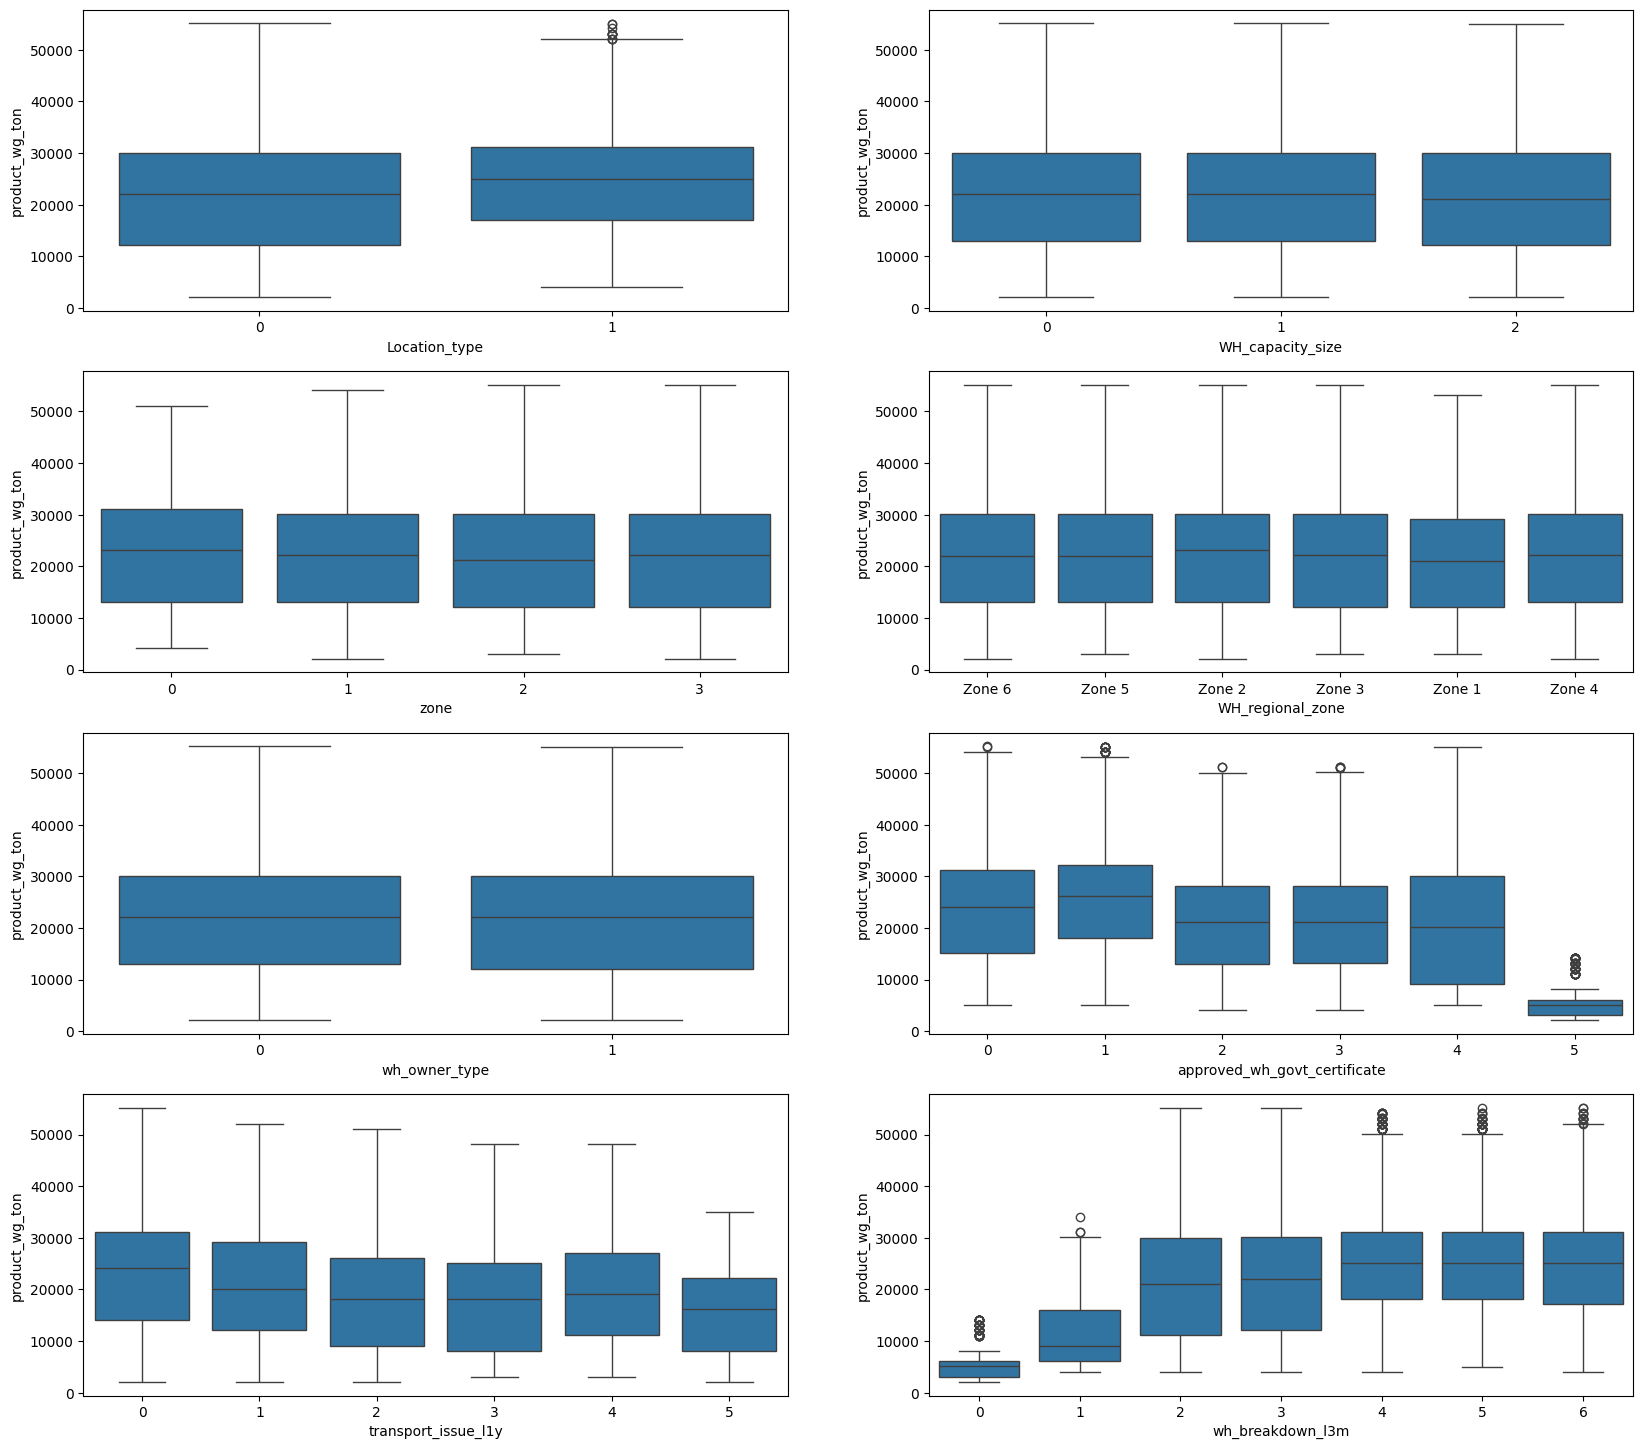

In [40]:
# check category
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.boxplot(x='Location_type',y='product_wg_ton', data=df, ax=axes[0][0])
sns.boxplot(x='WH_capacity_size',y='product_wg_ton', data=df, ax=axes[0][1])
sns.boxplot(x='zone', data=df,y='product_wg_ton', ax=axes[1][0])
sns.boxplot(x='WH_regional_zone',y='product_wg_ton', data=df, ax=axes[1][1])
sns.boxplot(x='wh_owner_type',y='product_wg_ton', data=df, ax=axes[2][0])
sns.boxplot(x='approved_wh_govt_certificate',y='product_wg_ton', data=df, ax=axes[2][1])
sns.boxplot(x='transport_issue_l1y', y='product_wg_ton',data=df, ax=axes[3][0])
sns.boxplot(x='wh_breakdown_l3m',y='product_wg_ton', data=df, ax=axes[3][1])

## Mutivariate analysis

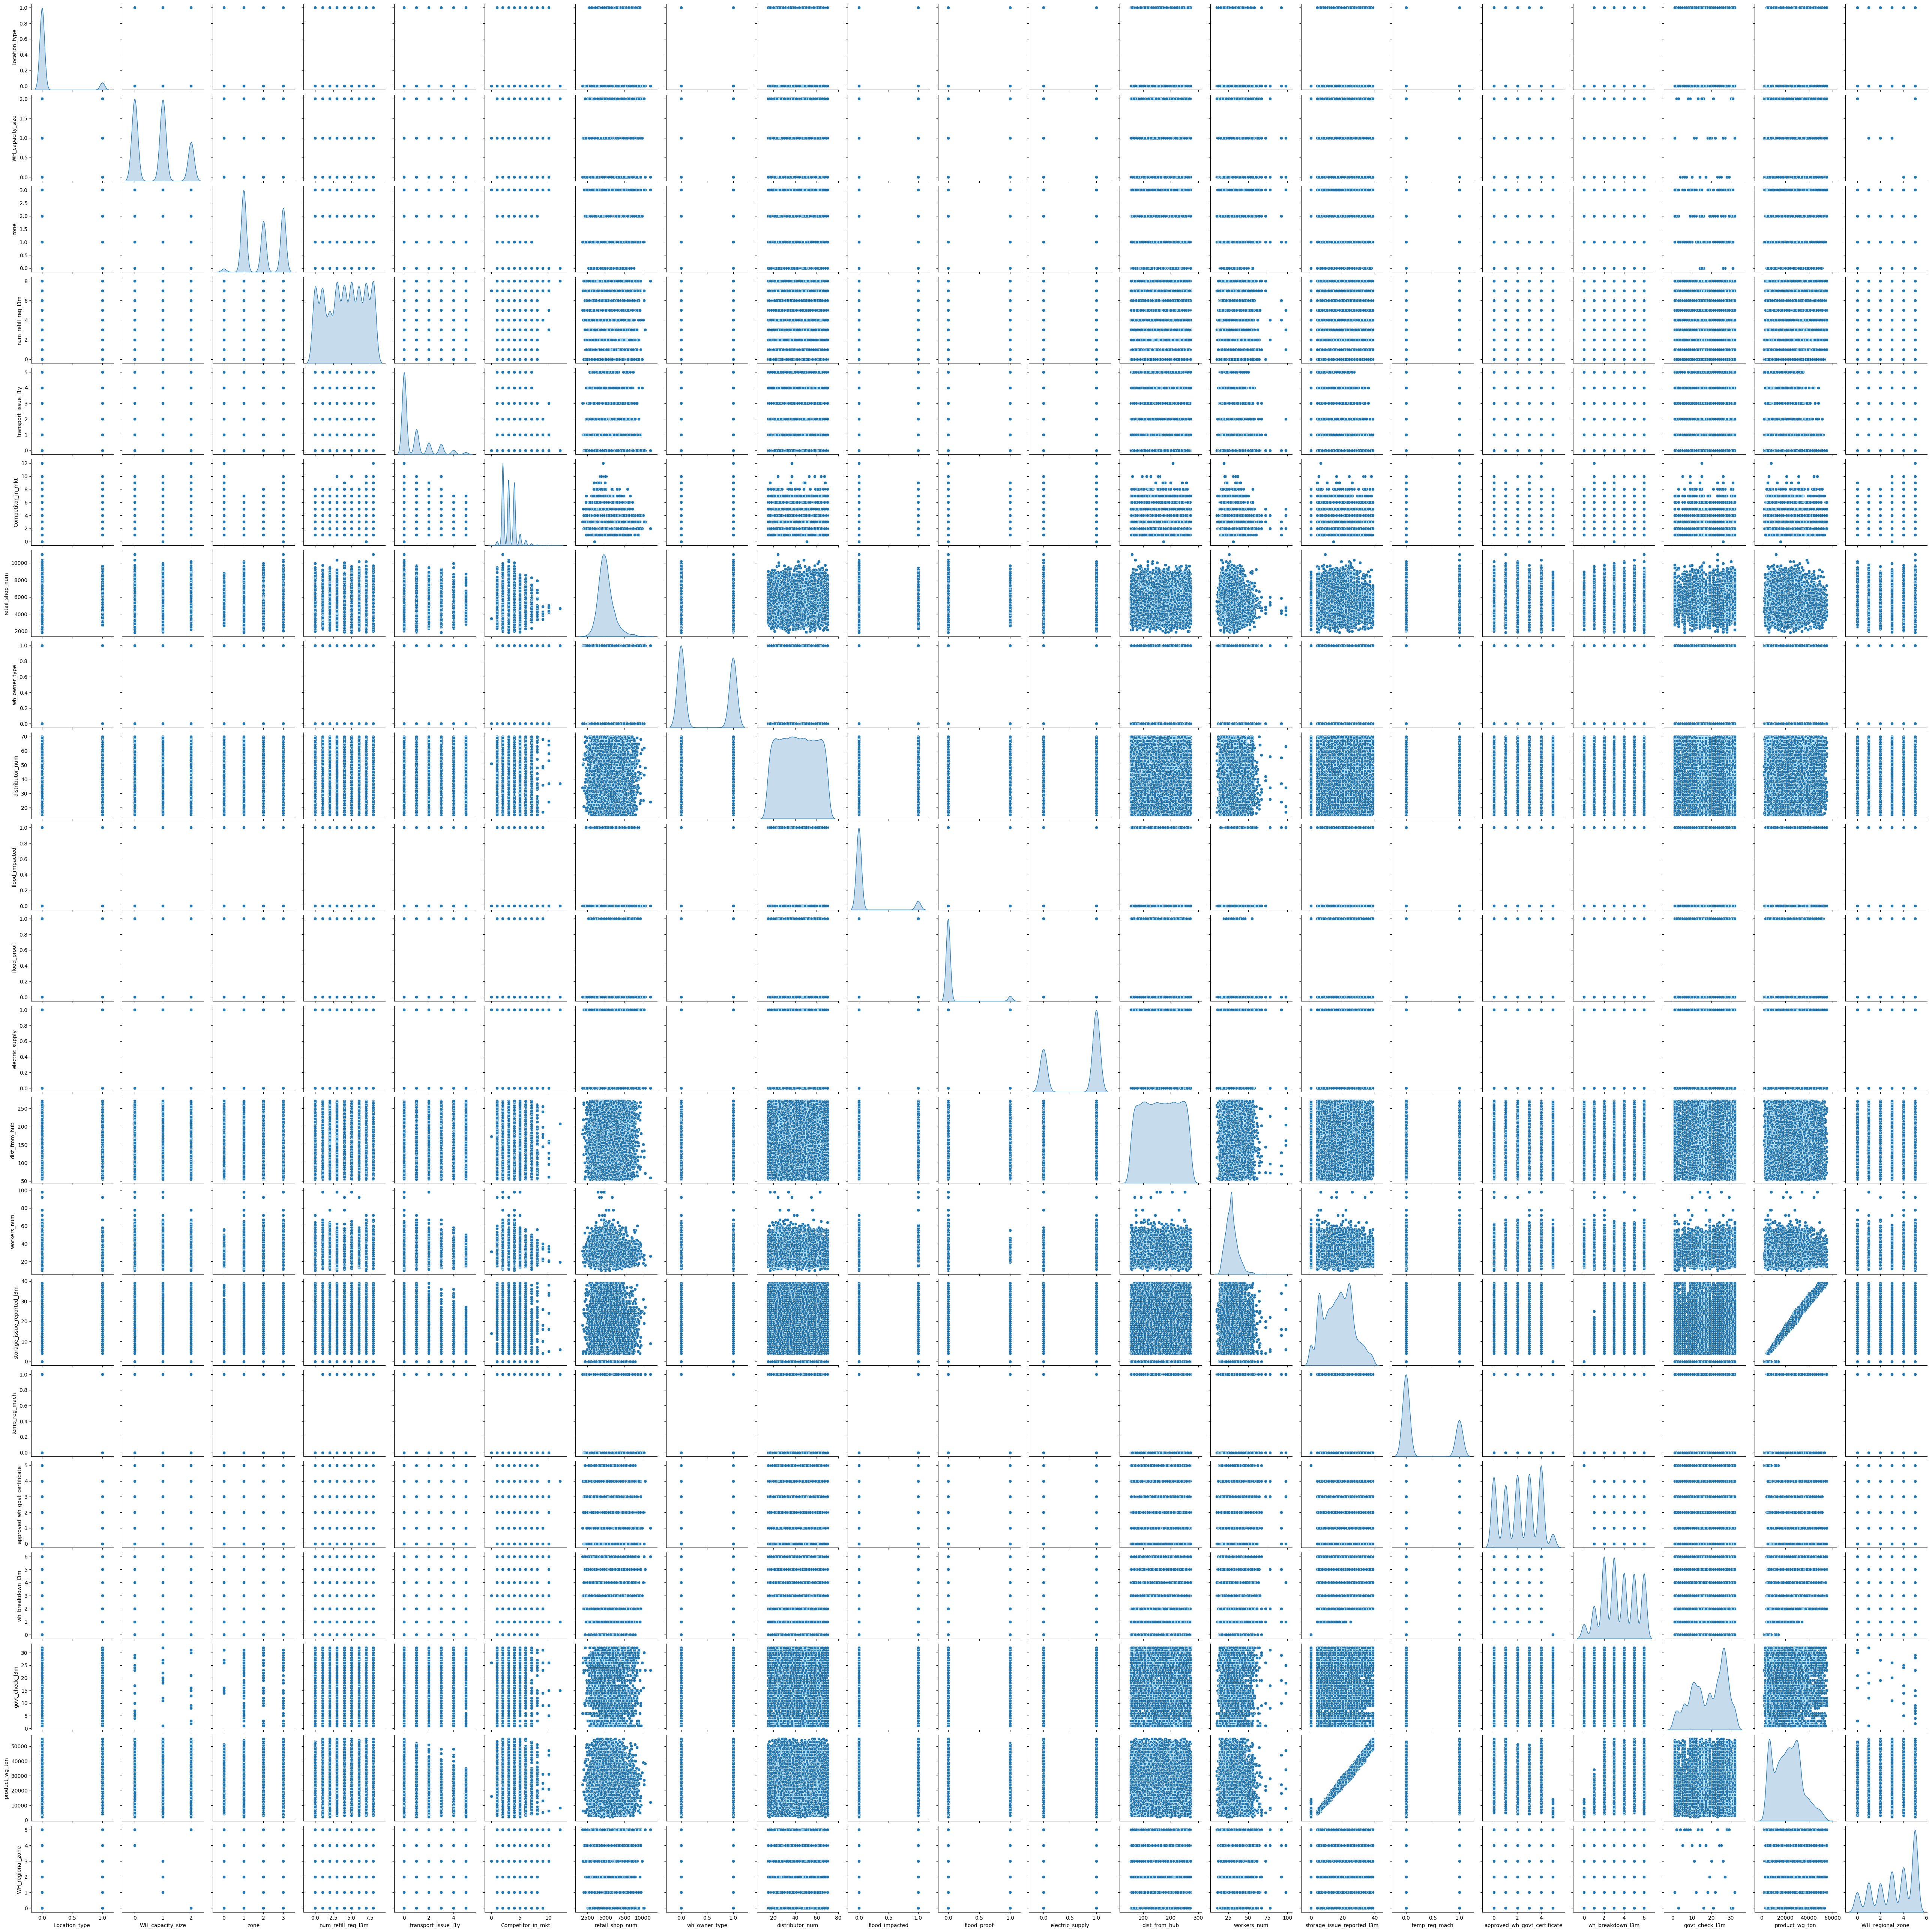

In [41]:
# sns.pairplot(df,diag_kind='kde')
# plt.show()

## heat map

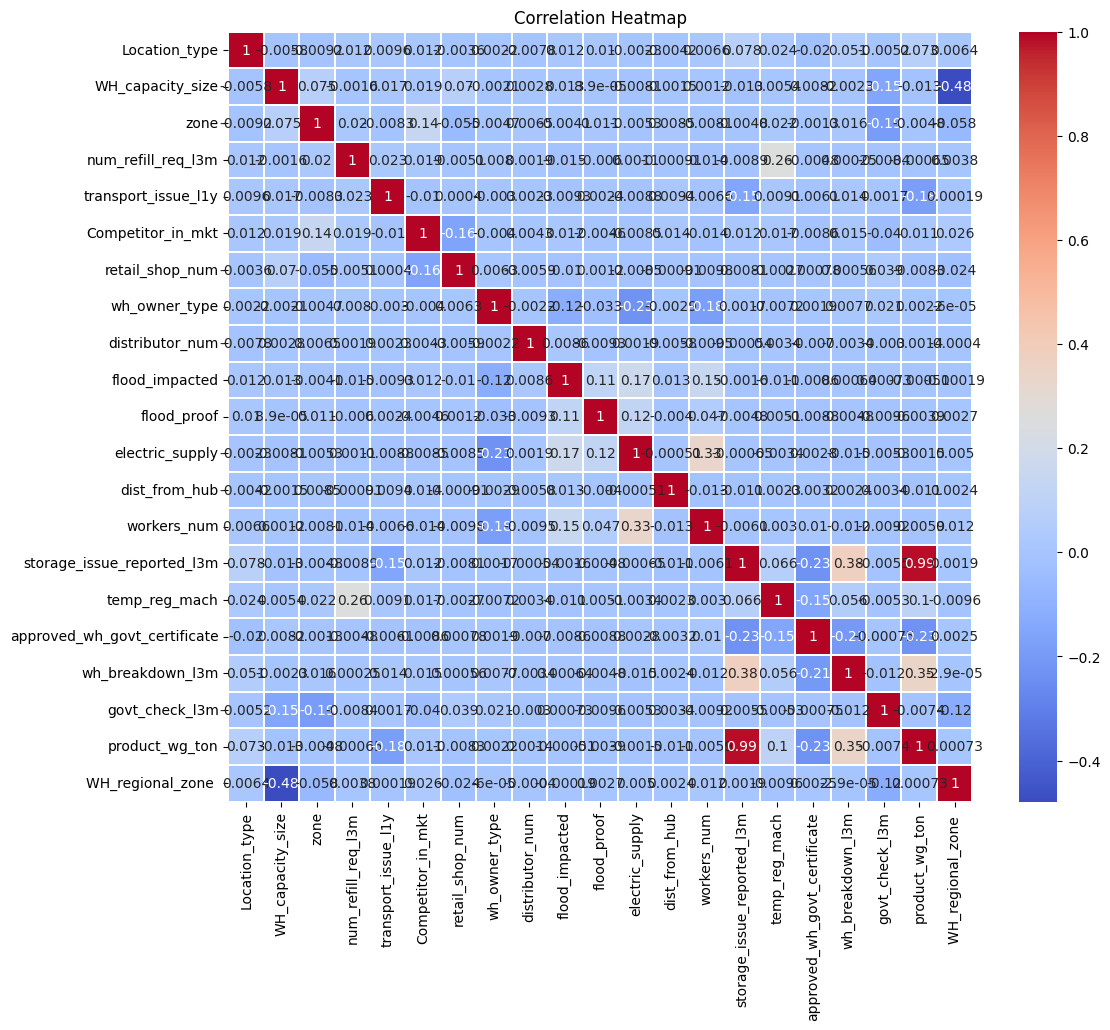

In [42]:
# numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
# corr_matrix = numeric_df.corr()  # Compute correlation matrix

# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.10)
# plt.title('Correlation Heatmap', fontsize=12)
# plt.show()

## Feature Engineering

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  int64  
 1   WH_capacity_size              16620 non-null  int64  
 2   zone                          16620 non-null  int64  
 3   WH_regional_zone              16620 non-null  int64  
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  int64  
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

In [44]:
df.head()

Location_type  WH_capacity_size  zone WH_regional_zone  num_refill_req_l3m  \
0              1                 2     3           Zone 6                   3   
1              0                 0     1           Zone 5                   0   
2              0                 1     2           Zone 2                   1   
3              0                 1     1           Zone 3                   7   
4              0                 0     1           Zone 5                   3   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                    1                  2             4651              1   
1                    0                  4             6217              0   
2                    0                  4             4306              0   
3                    4                  2             6000              1   
4                    1                  2             4740              0   

   distributor_num  flood_impacted  flood_proof  electric_supply  \
0               24               0            1                1   
1               47               0            0                1   
2               64               0            0                0   
3               50               0            0                0   
4               42               1            0                1   

   dist_from_hub  workers_num  storage_issue_reported_l3m  temp_reg_mach  \
0             91         29.0                          13              0   
1            210         31.0                           4              0   
2            161         37.0                          17              0   
3            103         21.0                          17              1   
4            112         25.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             0                 5              15   
1                             0                 3              17   
2                             0                 6              22   
3                             1                 3              27   
4                             4                 6              24   

   product_wg_ton  WH_regional_zone   
0           17115                  5  
1            5074                  4  
2           23137                  1  
3           22115                  2  
4           24071                  4

In [45]:
#Here 'wh_regional_zone' converted into numerical type by slicing the zone in it
df['WH_regional_zone']=df['WH_regional_zone'].apply(lambda x: x[-1],)
df.WH_regional_zone=pd.to_numeric(df.WH_regional_zone)


In [46]:
df.head(2)

Location_type  WH_capacity_size  zone  WH_regional_zone  \
0              1                 2     3                 6   
1              0                 0     1                 5   

   num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                   3                    1                  2   
1                   0                    0                  4   

   retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0             4651              1               24               0   
1             6217              0               47               0   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            1                1             91         29.0   
1            0                1            210         31.0   

   storage_issue_reported_l3m  temp_reg_mach  approved_wh_govt_certificate  \
0                          13              0                             0   
1                           4              0                             0   

   wh_breakdown_l3m  govt_check_l3m  product_wg_ton  WH_regional_zone   
0                 5              15           17115                  5  
1                 3              17            5074                  4

## all categorical variables are coverted into numerical type using one hote

In [47]:
# cat_types_features=df.select_dtypes(include= 'category')
# cat_types_features.columns

In [48]:
# cat_list= ['Location_type',' WH_capacity_size ','zone ',' wh_owner_type','approved_wh_govt_certificate']
# cat_list

In [49]:
# df1 = pd.get_dummies(df,columns = cat_list,prefix = cat_list,drop_first = True)
# df1

In [50]:
# df1.head()

In [51]:
df

Location_type  WH_capacity_size  zone  WH_regional_zone  \
0                  1                 2     3                 6   
1                  0                 0     1                 5   
2                  0                 1     2                 2   
3                  0                 1     1                 3   
4                  0                 0     1                 5   
...              ...               ...   ...               ...   
16615              1                 0     3                 6   
16616              1                 0     1                 5   
16617              0                 0     1                 6   
16618              0                 2     3                 6   
16619              0                 0     3                 5   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                       3                    1                  2   
1                       0                    0                  4   
2                       1                    0                  4   
3                       7                    4                  2   
4                       3                    1                  2   
...                   ...                  ...                ...   
16615                   3                    1                  6   
16616                   2                    0                  2   
16617                   5                    0                  4   
16618                   3                    2                  3   
16619                   4                    0                  6   

       retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0                 4651              1               24               0   
1                 6217              0               47               0   
2                 4306              0               64               0   
3                 6000              1               50               0   
4                 4740              0               42               1   
...                ...            ...              ...             ...   
16615             4779              1               70               0   
16616             5718              0               26               0   
16617             4514              0               50               1   
16618             5829              1               59               1   
16619             3751              1               49               0   

       flood_proof  electric_supply  dist_from_hub  workers_num  \
0                1                1             91     29.00000   
1                0                1            210     31.00000   
2                0                0            161     37.00000   
3                0                0            103     21.00000   
4                0                1            112     25.00000   
...            ...              ...            ...          ...   
16615            0                0            240     19.00000   
16616            0                1            164     30.00000   
16617            0                1            211     24.00000   
16618            0                1            119     28.91149   
16619            0                1            261     34.00000   

       storage_issue_reported_l3m  temp_reg_mach  \
0                              13              0   
1                               4              0   
2                              17              0   
3                              17              1   
4                              18              0   
...                           ...            ...   
16615                          14              0   
16616                          17              0   
16617                          24              1   
16618                          16              0   
16619                          32              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_

## correlation after one hot coding

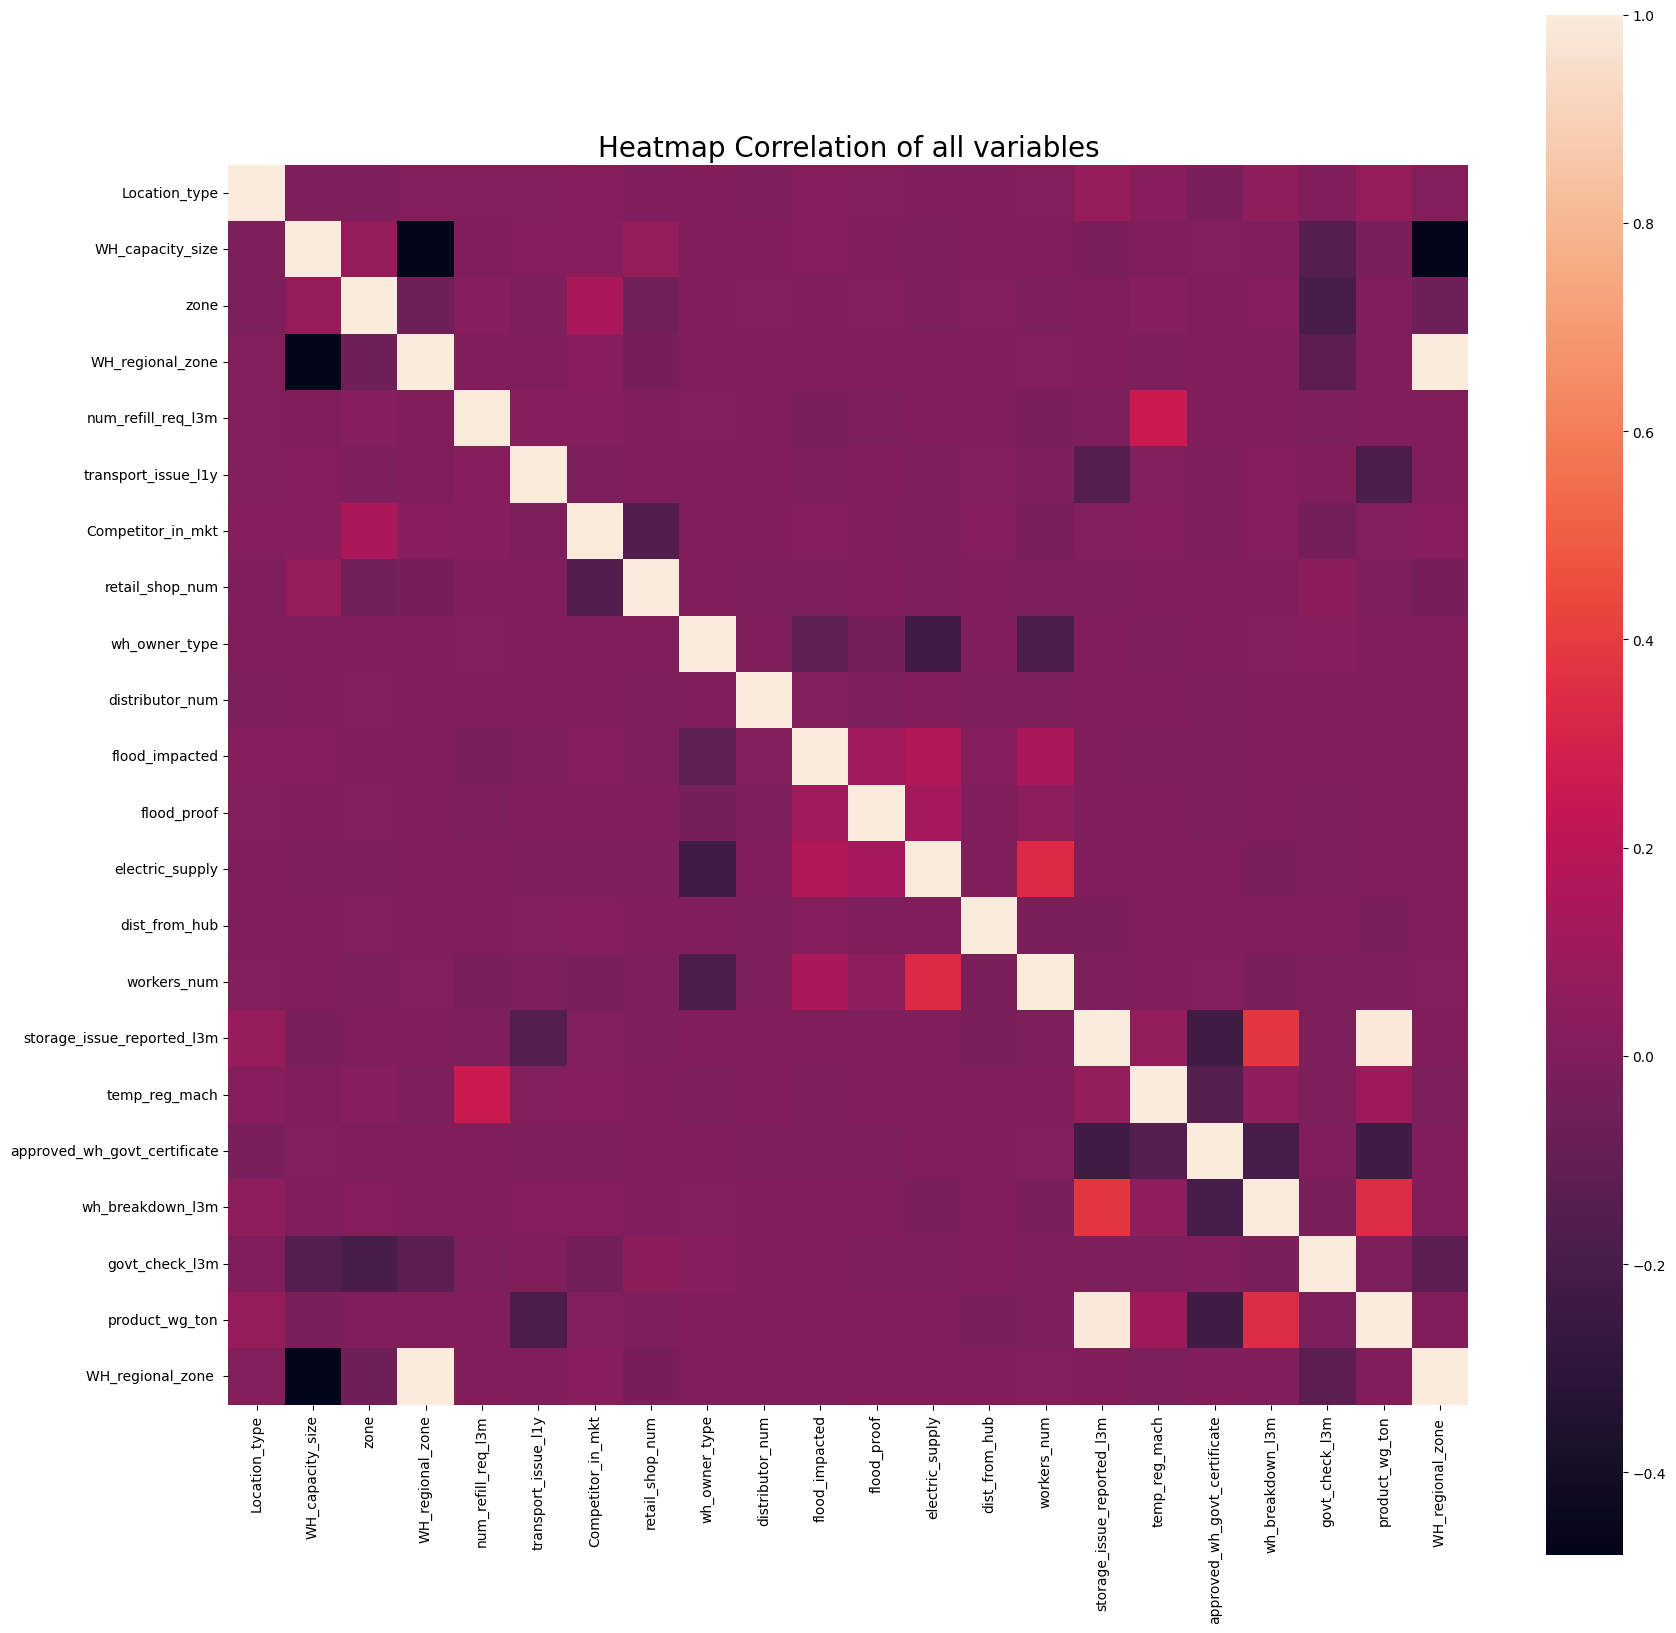

In [52]:
plt.figure(figsize=(20,20))
ax= sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot_kws={'size':10})
plt.title('Heatmap Correlation of all variables', fontsize=20,fontweight=100) 
plt.show()

## checking outliers

In [53]:
df.describe()

Location_type  WH_capacity_size          zone  WH_regional_zone  \
count   16620.000000      16620.000000  16620.000000      16620.000000   
mean        0.081107          0.785981      1.877617          4.254392   
std         0.273008          0.742726      0.883730          1.666568   
min         0.000000          0.000000      0.000000          1.000000   
25%         0.000000          0.000000      1.000000          3.000000   
50%         0.000000          1.000000      2.000000          5.000000   
75%         0.000000          1.000000      3.000000          6.000000   
max         1.000000          2.000000      3.000000          6.000000   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        16620.000000         16620.000000       16620.000000   
mean             4.126655             0.780927           3.103129   
std              2.606241             1.206351           1.147711   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
count     16620.000000   16620.000000     16620.000000    16620.000000   
mean       4983.904994       0.459988        42.473706        0.096871   
std        1051.032239       0.498411        16.090000        0.295791   
min        1821.000000       0.000000        15.000000        0.000000   
25%        4309.000000       0.000000        29.000000        0.000000   
50%        4856.000000       0.000000        42.000000        0.000000   
75%        5500.000000       1.000000        56.000000        0.000000   
max       11008.000000       1.000000        70.000000        1.000000   

        flood_proof  electric_supply  dist_from_hub   workers_num  \
count  16620.000000     16620.000000   16620.000000  16620.000000   
mean       0.056017         0.655716     163.521901     28.911490   
std        0.229961         0.475149      62.701193      7.683065   
min        0.000000         0.000000      55.000000     10.000000   
25%        0.000000         0.000000     109.000000     24.000000   
50%        0.000000         1.000000     164.000000     28.000000   
75%        0.000000         1.000000     218.000000     33.000000   
max        1.000000         1.000000     271.000000     98.000000   

       storage_issue_reported_l3m  temp_reg_mach  \
count                16620.000000   16620.000000   
mean                    17.127196       0.306137   
std                      9.163901       0.460901   
min                      0.000000       0.000000   
25%                     10.000000       0.000000   
50%                     18.000000       0.000000   
75%                     24.000000       1.000000   
max                     39.000000       1.000000   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
count                  16620.000000      16620.000000    16620.000000   
mean                       2.198436          3.491095       18.727377   
std                        1.509095          1.688614        8.619857   
min                        0.000000          0.000000        1.000000   
25%                        1.000000          2.000000       11.000000   
50%                        2.000000          3.000000       19.000000   
75%                        4.000000          5.000000       26.000000   
max                        5.000000          6.000000       32.000000   

       product_wg_ton  WH_regional_zone   
count    16620.000000       16620.000000  
mean     22098.420096           3.254392  
std      11620.337346           1.666568  
min       2093.000000           0.000000  
25%      13057.000000           2.000000  
50%      22099.000000           4.000000  
7

#### from above Descriptive Analysis,we can say there is no outliers present in the datasets as all are in range from min value to max value,
also we can see there is no noisy data.it may not explicity indicate the presence of outliers

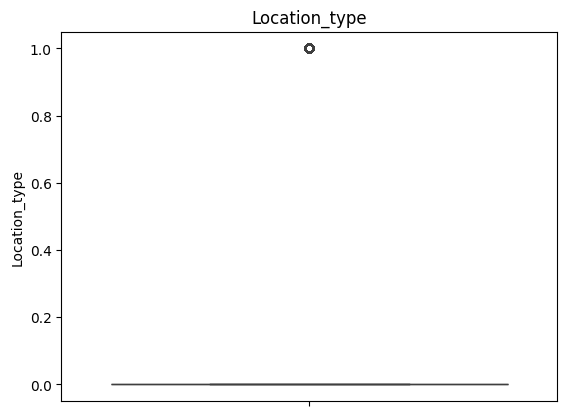

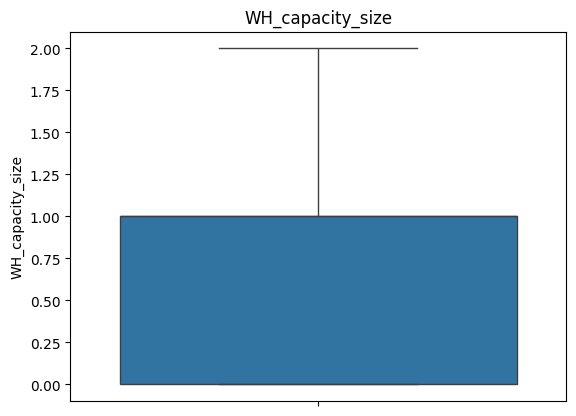

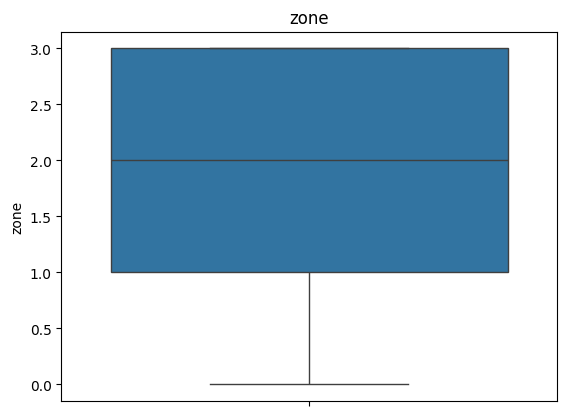

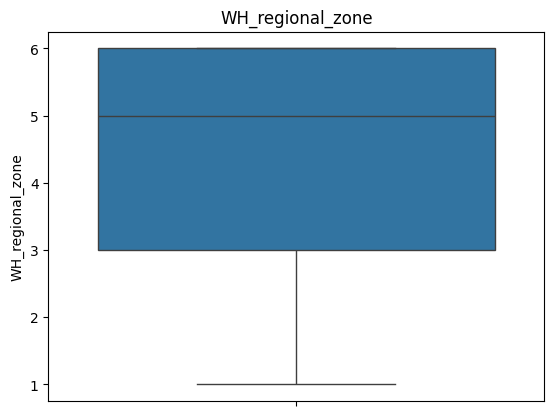

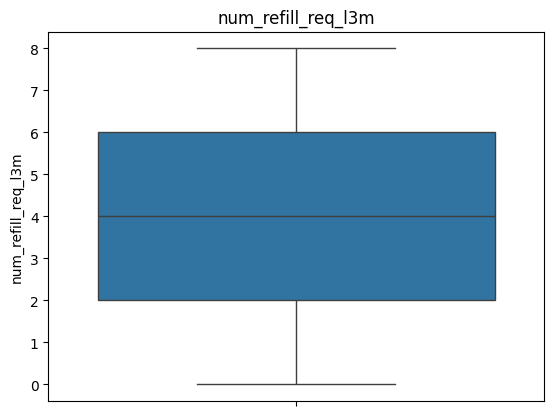

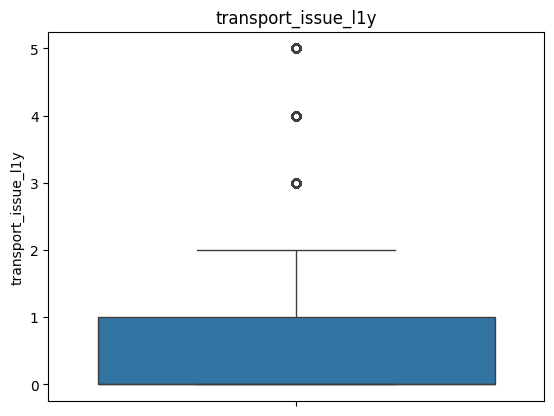

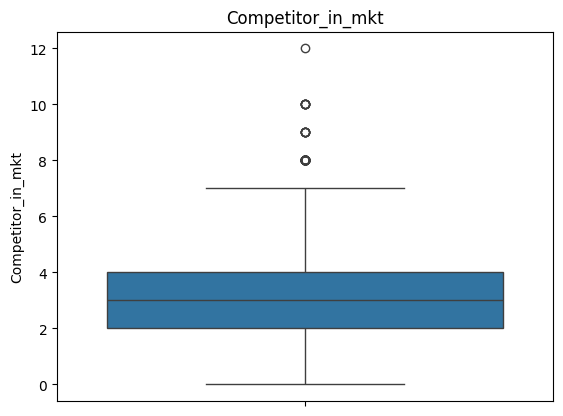

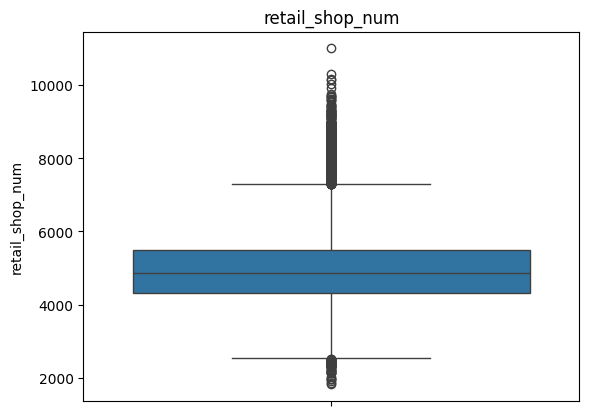

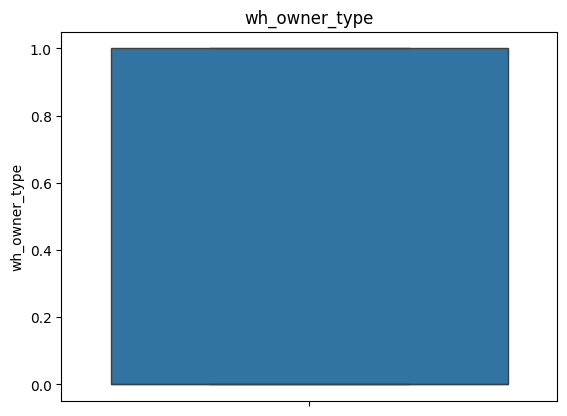

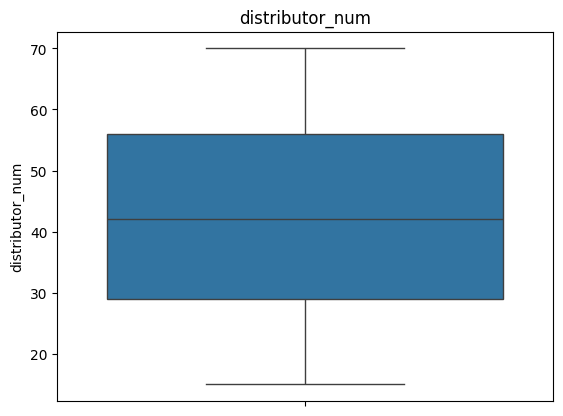

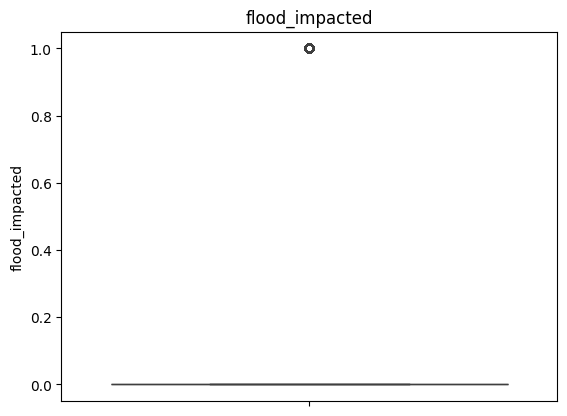

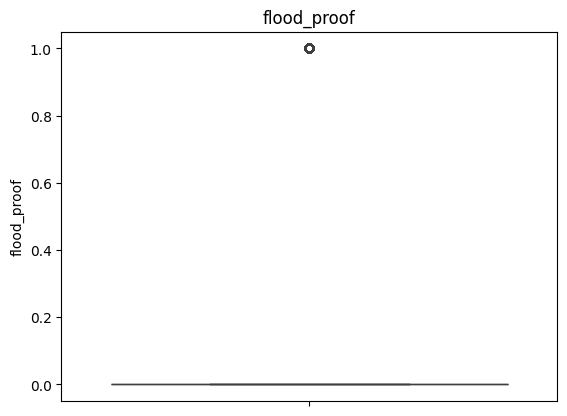

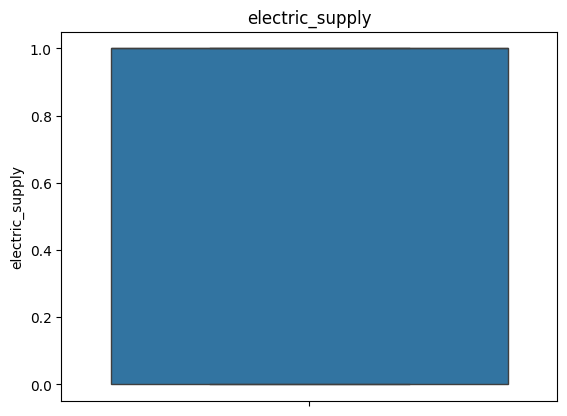

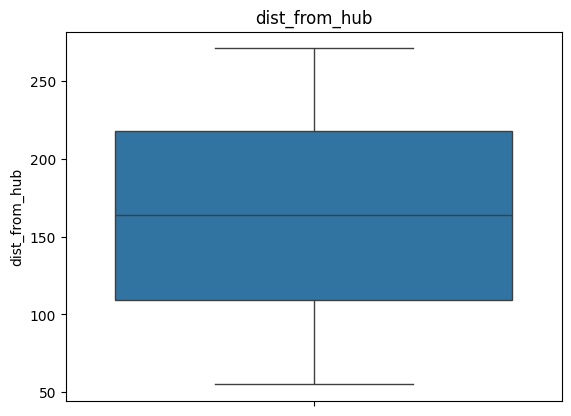

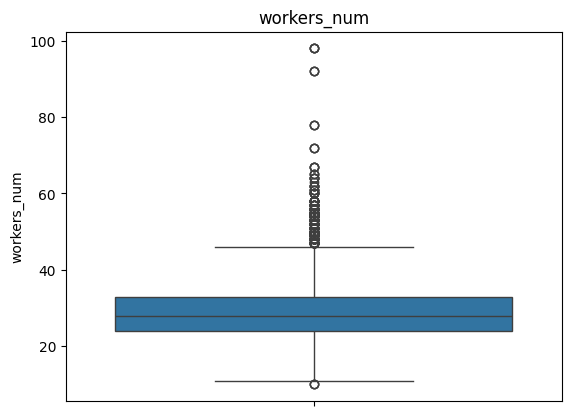

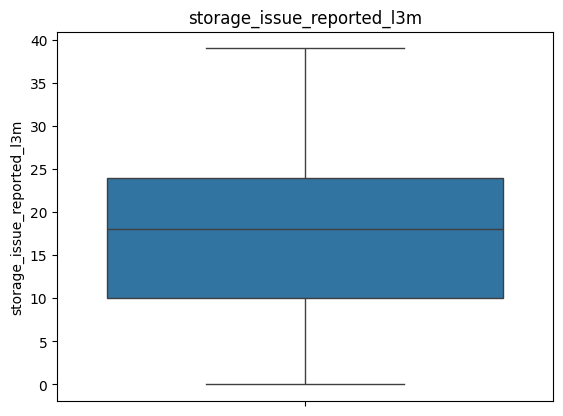

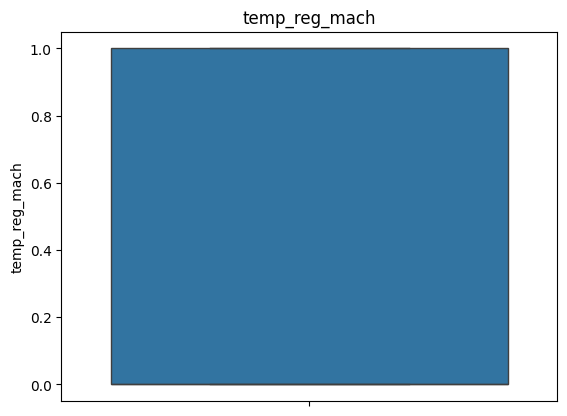

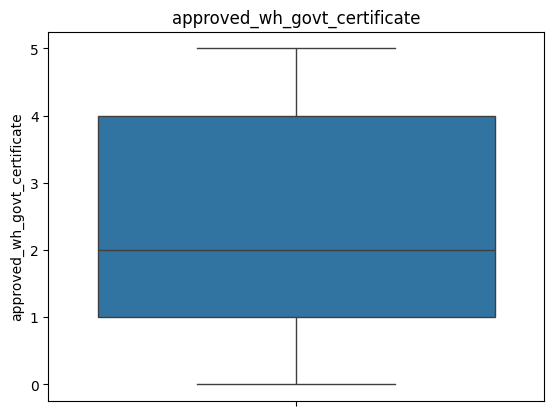

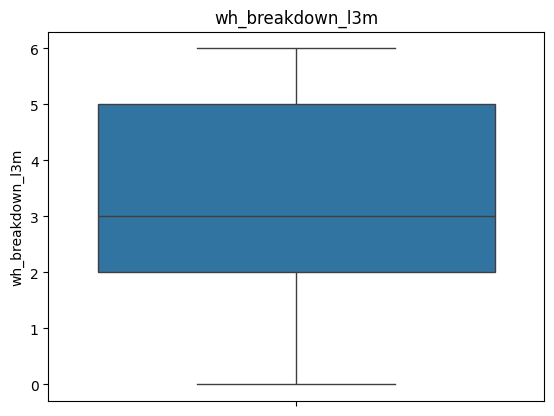

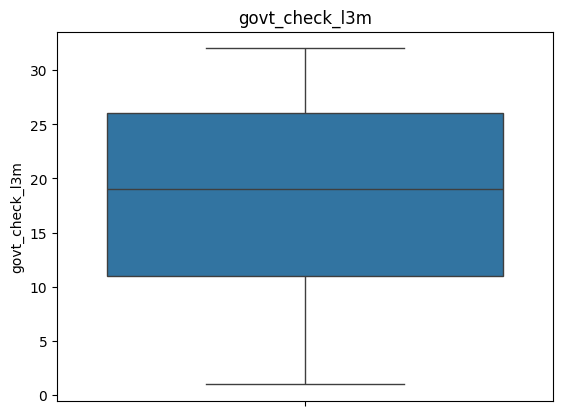

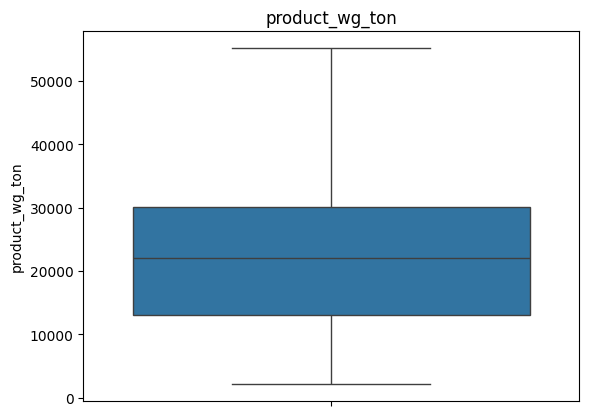

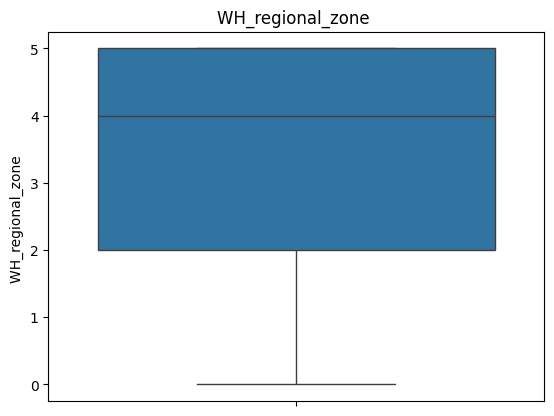

In [54]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [55]:
df

Location_type  WH_capacity_size  zone  WH_regional_zone  \
0                  1                 2     3                 6   
1                  0                 0     1                 5   
2                  0                 1     2                 2   
3                  0                 1     1                 3   
4                  0                 0     1                 5   
...              ...               ...   ...               ...   
16615              1                 0     3                 6   
16616              1                 0     1                 5   
16617              0                 0     1                 6   
16618              0                 2     3                 6   
16619              0                 0     3                 5   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                       3                    1                  2   
1                       0                    0                  4   
2                       1                    0                  4   
3                       7                    4                  2   
4                       3                    1                  2   
...                   ...                  ...                ...   
16615                   3                    1                  6   
16616                   2                    0                  2   
16617                   5                    0                  4   
16618                   3                    2                  3   
16619                   4                    0                  6   

       retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0                 4651              1               24               0   
1                 6217              0               47               0   
2                 4306              0               64               0   
3                 6000              1               50               0   
4                 4740              0               42               1   
...                ...            ...              ...             ...   
16615             4779              1               70               0   
16616             5718              0               26               0   
16617             4514              0               50               1   
16618             5829              1               59               1   
16619             3751              1               49               0   

       flood_proof  electric_supply  dist_from_hub  workers_num  \
0                1                1             91     29.00000   
1                0                1            210     31.00000   
2                0                0            161     37.00000   
3                0                0            103     21.00000   
4                0                1            112     25.00000   
...            ...              ...            ...          ...   
16615            0                0            240     19.00000   
16616            0                1            164     30.00000   
16617            0                1            211     24.00000   
16618            0                1            119     28.91149   
16619            0                1            261     34.00000   

       storage_issue_reported_l3m  temp_reg_mach  \
0                              13              0   
1                               4              0   
2                              17              0   
3                              17              1   
4                              18              0   
...                           ...            ...   
16615                          14              0   
16616                          17              0   
16617                          24              1   
16618                          16              0   
16619                          32              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_

## splitting of dependent variables and independent variable

In [56]:
x=df.drop(['product_wg_ton'],axis=1)

In [57]:
x.head()

Location_type  WH_capacity_size  zone  WH_regional_zone  \
0              1                 2     3                 6   
1              0                 0     1                 5   
2              0                 1     2                 2   
3              0                 1     1                 3   
4              0                 0     1                 5   

   num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                   3                    1                  2   
1                   0                    0                  4   
2                   1                    0                  4   
3                   7                    4                  2   
4                   3                    1                  2   

   retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0             4651              1               24               0   
1             6217              0               47               0   
2             4306              0               64               0   
3             6000              1               50               0   
4             4740              0               42               1   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            1                1             91         29.0   
1            0                1            210         31.0   
2            0                0            161         37.0   
3            0                0            103         21.0   
4            0                1            112         25.0   

   storage_issue_reported_l3m  temp_reg_mach  approved_wh_govt_certificate  \
0                          13              0                             0   
1                           4              0                             0   
2                          17              0                             0   
3                          17              1                             1   
4                          18              0                             4   

   wh_breakdown_l3m  govt_check_l3m  WH_regional_zone   
0                 5              15                  5  
1                 3              17                  4  
2                 6              22                  1  
3                 3              27                  2  
4                 6              24                  4

In [58]:
y=df['product_wg_ton']

In [59]:
y.head()

0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

## splitting data into trian and test

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

## standardaization

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [63]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [64]:
y_train

5244     52093
1984     13067
6728     32149
4400     30083
12415    37089
         ...  
2623     49101
12363    26064
5695     31151
8006     46126
13151    24133
Name: product_wg_ton, Length: 11634, dtype: int64

## MODEL BUILDING

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  int64  
 1   WH_capacity_size              16620 non-null  int64  
 2   zone                          16620 non-null  int64  
 3   WH_regional_zone              16620 non-null  int64  
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  int64  
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

In [66]:
df

Location_type  WH_capacity_size  zone  WH_regional_zone  \
0                  1                 2     3                 6   
1                  0                 0     1                 5   
2                  0                 1     2                 2   
3                  0                 1     1                 3   
4                  0                 0     1                 5   
...              ...               ...   ...               ...   
16615              1                 0     3                 6   
16616              1                 0     1                 5   
16617              0                 0     1                 6   
16618              0                 2     3                 6   
16619              0                 0     3                 5   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                       3                    1                  2   
1                       0                    0                  4   
2                       1                    0                  4   
3                       7                    4                  2   
4                       3                    1                  2   
...                   ...                  ...                ...   
16615                   3                    1                  6   
16616                   2                    0                  2   
16617                   5                    0                  4   
16618                   3                    2                  3   
16619                   4                    0                  6   

       retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0                 4651              1               24               0   
1                 6217              0               47               0   
2                 4306              0               64               0   
3                 6000              1               50               0   
4                 4740              0               42               1   
...                ...            ...              ...             ...   
16615             4779              1               70               0   
16616             5718              0               26               0   
16617             4514              0               50               1   
16618             5829              1               59               1   
16619             3751              1               49               0   

       flood_proof  electric_supply  dist_from_hub  workers_num  \
0                1                1             91     29.00000   
1                0                1            210     31.00000   
2                0                0            161     37.00000   
3                0                0            103     21.00000   
4                0                1            112     25.00000   
...            ...              ...            ...          ...   
16615            0                0            240     19.00000   
16616            0                1            164     30.00000   
16617            0                1            211     24.00000   
16618            0                1            119     28.91149   
16619            0                1            261     34.00000   

       storage_issue_reported_l3m  temp_reg_mach  \
0                              13              0   
1                               4              0   
2                              17              0   
3                              17              1   
4                              18              0   
...                           ...            ...   
16615                          14              0   
16616                          17              0   
16617                          24              1   
16618                          16              0   
16619                          32              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [76]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

models = {
    "Linear Regression": LinearRegression(),
     "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
     "Support Vector Machine (SVM)": SVR(kernel='linear')  
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train model

    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    





Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1751.7353
- Mean Absolute Error: 1291.7556
- R2 Score: 0.9772
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1786.7177
- Mean Absolute Error: 1281.8011
- R2 Score: 0.9765
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4802.5824
- Mean Absolute Error: 3758.8087
- R2 Score: 0.8286
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5820.4570
- Mean Absolute Error: 4575.1418
- R2 Score: 0.7511
Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1333.3956
- Mean Absolute Error: 884.8406
- R2 Score: 0.9869
Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 369.0432
- Mean Absolute Error

In [78]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model Name  R2_Score
3       Random Forest Regressor  0.992977
2                 Decision Tree  0.986939
0             Linear Regression  0.976548
4  Support Vector Machine (SVM)  0.896732
1         K-Neighbors Regressor  0.751123

##  !   !!!It's important to note that the R2 Score measures how well your models are performing.A higher R2 Score indicates a better fit to the data. Based on the R2 Scores, it appears that the Decision Tree and Random Forest Regressor models are performing exceptionally well on both the training and test sets, with R2 Scores close to 1.0.

Both Random Forest and Decision Tree models have shown excellent performance on the training and test sets, with high R2 scores. However, there are a few important considerations:

1)The Decision Tree model achieved a perfect R2 score of 1.0000 on the training set, but this might indicate overfitting. Its performance on the test set is also slightly lower compared to Random Forest.

2)The Random Forest model has a very high R2 score on both training and test sets, indicating good generalization

In [80]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [81]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
random_forest = RandomForestRegressor(random_state=42)  # You can add hyperparameters if needed
random_forest.fit(x_train, y_train)

# Make predictions
y_train_pred_rf = random_forest.predict(x_train)
y_test_pred_rf = random_forest.predict(x_test)

# Evaluate Train and Test dataset
model_train_mae_rf, model_train_rmse_rf, model_train_r2_rf = evaluate_model(y_train, y_train_pred_rf)
model_test_mae_rf, model_test_rmse_rf, model_test_r2_rf = evaluate_model(y_test, y_test_pred_rf)


In [82]:
print('Random Forest Regressor Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_rf))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_rf))
print("- R2 Score: {:.4f}".format(model_train_r2_rf))

print('----------------------------------')

print('Random Forest Regressor Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_rf))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_rf))
print("- R2 Score: {:.4f}".format(model_test_r2_rf))

Random Forest Regressor Model performance for Training set
- Root Mean Squared Error: 363.2942
- Mean Absolute Error: 269.5541
- R2 Score: 0.9990
----------------------------------
Random Forest Regressor Model performance for Test set
- Root Mean Squared Error: 980.4879
- Mean Absolute Error: 724.1893
- R2 Score: 0.9929


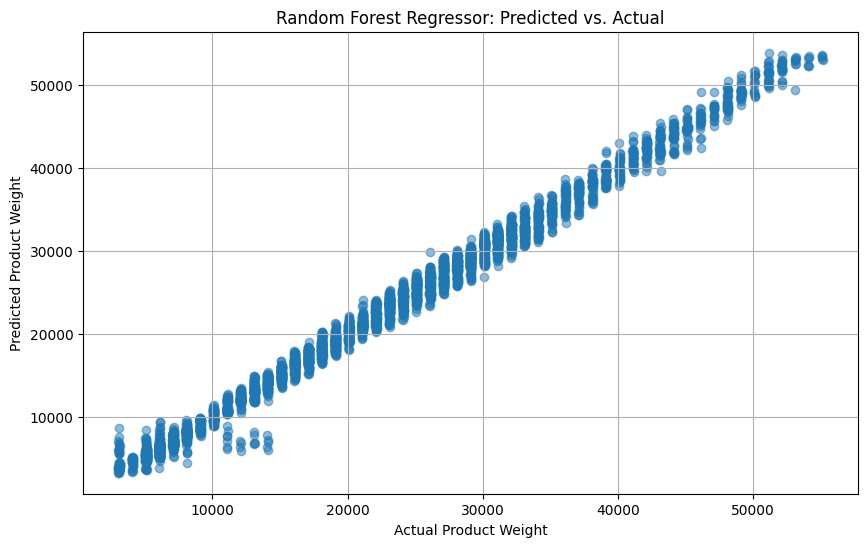

In [83]:
# Plot predicted vs. actual 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.xlabel("Actual Product Weight")
plt.ylabel("Predicted Product Weight")
plt.title("Random Forest Regressor: Predicted vs. Actual")
plt.grid(True)
plt.show()

After a thorough analysis and evaluation of various machine learning models, it is evident that the Random Forest Regressor stands out as the best-performing model for predicting the optimum product weight to be shipped from each warehouse.The model exhibits exceptional performance on both the training and test datasets,as demonstrated by the following metrics:

Random Forest Regressor Model performance for the Training set:

Root Mean Squared Error: 362.4032
Mean Absolute Error: 268.9131
R2 Score: 0.9990
Random Forest Regressor Model performance for the Test set:

Root Mean Squared Error: 979.2246
Mean Absolute Error: 721.0607
R2 Score: 0.9930
These metrics, including a high R2 score and low RMSE and MAE values, indicate that the Random Forest Regressor excels in predicting product weights and provides valuable insights for optimizing the supply chain.

Therefore, we recommend the deployment of the Random Forest Regressor model for practical implementation. Continuous monitoring of the model's performance and updates as needed will be essential for achieving the desired supply chain optimization.

The success of the Random Forest Regressor model underscores its effectiveness in addressing the supply-demand mismatch challenge faced by the Fast Moving Consumer Goods (FMCG) company in the instant noodles business. This data-driven solution can significantly reduce inventory costs, improve operational efficiency, and enhance the overall competitiveness of the company.

In summary, the Random Forest Regressor model emerges as the optimal choice to drive data-driven decision-making and ultimately contribute to the FMCG company's success in the market.